### 데이터 사전 처리(Preprocessing)

In [1]:
import pandas as pd
from google.colab import drive


# 구글 드라이브 마운트
drive.mount('/content/drive')

# Raw Data
raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/프로젝트/2023산업안전보건논문경진대회/9th_siltae_public_new_211102.csv")

# 결측치 열 제거
raw = raw.dropna(axis = 1)

# 원하는 열만 추출
new_state = raw[["Q10_1_1","Q10_2_1","Q10_3_1","Q10_4_1","Q10_5_1","Q10_6_1","Q10_7_1","Q11_2","Q13","Q14_1",
                "Q15_1","Q15_8","Q15_9","Q16_1","Q16_2","Q17_1"]]

new_behavior = raw[["Q21_1_1","Q21_1_2","Q21_1_3","Q21_1_4","Q21_1_5","Q21_1_7","Q22","Q23","Q24_1","Q24_2","Q24_3","Q25_1"
,"Q25_2","Q25_3","Q25_4","Q25_5","Q25_6","Q25_7","Q25_8"
,"Q26_1","Q26_2","Q26_3","Q26_4"
,"Q29_5","Q29_6","Q29_7","Q30_1","Q30_2","Q30_3","Q31_1","Q31_2","Q31_3","Q31_4","Q31_5","Q31_6","Q32_1","Q32_2","Q32_3"
]]

# 이상치 값 대체 - 9998 to 3(보통)
new_behavior = new_behavior.replace({'Q29_5': 9998}, {'Q29_5': 3})
new_behavior = new_behavior.replace({'Q29_6': 9998}, {'Q29_6': 3})

Mounted at /content/drive


<ipython-input-1-895d716f7de0>:9: DtypeWarning: Columns (1,3,7,8,10,11,12,13,14,18,21,30,32,39,43,45,46,49,50,51,53,54,57,58,59,60,71,72,73,74,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/프로젝트/2023산업안전보건논문경진대회/9th_siltae_public_new_211102.csv")


In [2]:
#print(new_behavior.isna())
#print(new_state.isna())

#더미변수 지정
new_state = pd.get_dummies(new_state, columns = ["Q10_1_1","Q10_2_1","Q10_3_1","Q10_4_1","Q10_5_1","Q10_6_1","Q10_7_1","Q13","Q15_9","Q16_1","Q16_2","Q17_1"])

new_behavior = pd.get_dummies(new_behavior, columns = ["Q21_1_1","Q21_1_2","Q21_1_3","Q21_1_4","Q21_1_5","Q21_1_7","Q22","Q23","Q24_1","Q24_2","Q24_3"
,"Q30_1","Q30_2","Q30_3","Q31_1","Q31_2","Q31_3","Q31_4","Q31_5","Q31_6","Q32_1","Q32_2","Q32_3"])



In [3]:
#Q14_1과 Q15_1을 전체 근로자수 (Q2_1D3)으로 나누기
new_state["Q14_1"] =   new_state["Q14_1"] / raw["Q2_1D3"]
new_state["Q15_1"] =   new_state["Q15_1"] / raw["Q2_1D3"]

# 종속변수 평균값의 역수로 대체
change = new_behavior[['Q26_1','Q26_2','Q26_3','Q26_4']] # 대체 할 4개의 종속변수
m1 = change.mean(axis=1)
new_behavior.loc[:, 'mean'] = m1
new_behavior['mean_inverse'] = 1 / new_behavior['mean']
new_behavior = new_behavior.drop(["Q26_1", "Q26_2", "Q26_3", "Q26_4", "mean"], axis=1)

# inf값 대체
import numpy as np

new_behavior = new_behavior.replace(np.inf, 0)
mean_value = new_behavior.mean()
new_behavior = new_behavior.fillna(mean_value)

new_state = new_state.replace(np.inf, 0)



In [4]:
new_state

,Q11_2,Q14_1,Q15_1,Q15_8,Q10_1_1_1,Q10_1_1_2,Q10_2_1_1,Q10_2_1_2,Q10_3_1_1,Q10_3_1_2,...,Q15_9_2,Q15_9_3,Q16_1_1,Q16_1_2,Q16_2_1,Q16_2_2,Q17_1_1,Q17_1_2,Q17_1_3,Q17_1_4
0,2,0.024096,0.012048,1,0,1,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,2,0.012500,0.012500,1,0,1,0,1,0,1,...,0,1,1,0,1,0,0,0,1,0
2,2,0.042857,0.014286,8,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,0
3,1,0.010610,0.010610,40,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0.018182,0.036364,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,2,0.000000,0.000000,4,1,0,0,1,0,1,...,0,1,1,0,1,0,0,0,0,1
5215,2,0.048649,0.059459,11,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
5216,2,0.017391,0.008696,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
5217,2,0.016393,0.000000,3,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [5]:
new_behavior

,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q29_5,Q29_6,...,Q31_5_2,Q31_6_1,Q31_6_2,Q32_1_1,Q32_1_2,Q32_2_1,Q32_2_2,Q32_3_1,Q32_3_2,mean_inverse
0,3,4,4,3,3,4,3,3,3,3,...,1,0,1,0,1,0,1,0,1,0.333333
1,5,5,5,5,5,4,4,4,3,3,...,1,0,1,1,0,1,0,0,1,0.250000
2,4,5,5,5,5,5,5,5,3,5,...,1,0,1,1,0,1,0,0,1,0.210526
3,5,5,5,5,5,5,5,5,5,5,...,0,1,0,1,0,1,0,1,0,0.250000
4,3,3,3,3,3,3,3,3,3,3,...,1,0,1,0,1,0,1,0,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,3,3,3,3,3,3,3,3,3,3,...,1,0,1,0,1,1,0,1,0,0.333333
5215,3,4,4,4,4,4,4,4,3,3,...,0,1,0,1,0,1,0,1,0,0.250000
5216,2,2,3,3,2,2,3,3,3,3,...,0,1,0,1,0,0,1,0,1,0.363636
5217,4,4,4,4,4,4,4,4,1,1,...,1,0,1,0,1,0,1,0,1,0.250000


In [6]:
new_state.columns
new_state = new_state.drop(["Q15_9_ "], axis=1)

In [7]:
# 독립변수, 종속변수 이름 대체

#불안전상태
# new_state 독립변수 : 기존 => S
# new_state 종속변수 : 기존 Q11_2 => worker unsafe condition

#불안전행동
# new_behavior 독립변수 : 기존 => B
# new_behavior 종속변수 : 기존 'Q26_1','Q26_2','Q26_3','Q26_4' mean의 역수 => worker unsafe act


# for i in range(1,31,1):
#      print("S%d" %i, end = " ")
# for i in range(1,68,1):
#      print("B%d" %i, end = " ")


# 불안전상태

new_state = new_state.rename(columns={'Q11_2': 'worker unsafe condition'})
new_state.columns = ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", 
"S16", 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29','S30',"worker unsafe condition"]

X_state = ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15"
,"S16", 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29','S30']
# # 종속변수를 "worker unsafe condition"으로 지정
# y_state = new_state["worker unsafe condition"]

# # 종속변수 컬럼 삭제
# new_state = new_state.drop("worker unsafe condition", axis=1)

# # 종속변수를 더미 변수로 변환 (원핫인코딩)
# y_state = pd.get_dummies(y_state, prefix="worker unsafe condition")

# # 변환된 종속변수를 원래 데이터프레임에 추가
# new_state = pd.concat([new_state, y_state], axis=1)

# 종속변수를 더미화하여 0과 1로 만들기
y_state = pd.get_dummies(new_state, columns=["worker unsafe condition"], drop_first=True)



# 불안전행동
new_behavior.columns = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12", "B13", "B14", "B15", "B16",
                        "B17", "B18", "B19", "B20", "B21", "B22", "B23", "B24", "B25", "B26", "B27", "B28", "B29", "B30", "B31", 
                        "B32", "B33", "B34", 
                        'B35', 'B36', 'B37', 'B38', 'B39', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B50', 'B51', 'B52'
                        ,'B53','B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B60', 'B61', 'B62', "worker unsafe act"]

X_behavior = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12", "B13", "B14", "B15", "B16",
                        "B17", "B18", "B19", "B20", "B21", "B22", "B23", "B24", "B25", "B26", "B27", "B28", "B29", "B30", "B31", 
                        "B32", "B33", "B34", 
                        'B35', 'B36', 'B37', 'B38', 'B39', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B50', 'B51', 'B52'
                        ,'B53','B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B60', 'B61', 'B62']
y_behavior = new_behavior["worker unsafe act"]

In [8]:
new_state

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,worker unsafe condition
0,2,0.024096,0.012048,1,0,1,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,2,0.012500,0.012500,1,0,1,0,1,0,1,...,0,1,1,0,1,0,0,0,1,0
2,2,0.042857,0.014286,8,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,0
3,1,0.010610,0.010610,40,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0.018182,0.036364,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,2,0.000000,0.000000,4,1,0,0,1,0,1,...,0,1,1,0,1,0,0,0,0,1
5215,2,0.048649,0.059459,11,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
5216,2,0.017391,0.008696,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
5217,2,0.016393,0.000000,3,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [9]:
new_behavior

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B54,B55,B56,B57,B58,B59,B60,B61,B62,worker unsafe act
0,3,4,4,3,3,4,3,3,3,3,...,1,0,1,0,1,0,1,0,1,0.333333
1,5,5,5,5,5,4,4,4,3,3,...,1,0,1,1,0,1,0,0,1,0.250000
2,4,5,5,5,5,5,5,5,3,5,...,1,0,1,1,0,1,0,0,1,0.210526
3,5,5,5,5,5,5,5,5,5,5,...,0,1,0,1,0,1,0,1,0,0.250000
4,3,3,3,3,3,3,3,3,3,3,...,1,0,1,0,1,0,1,0,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,3,3,3,3,3,3,3,3,3,3,...,1,0,1,0,1,1,0,1,0,0.333333
5215,3,4,4,4,4,4,4,4,3,3,...,0,1,0,1,0,1,0,1,0,0.250000
5216,2,2,3,3,2,2,3,3,3,3,...,0,1,0,1,0,0,1,0,1,0.363636
5217,4,4,4,4,4,4,4,4,1,1,...,1,0,1,0,1,0,1,0,1,0.250000


<ipython-input-10-10d52c707ffa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_state["worker unsafe condition"])


<Axes: title={'center': 'worker unsafe condition'}, xlabel='worker unsafe condition', ylabel='Density'>

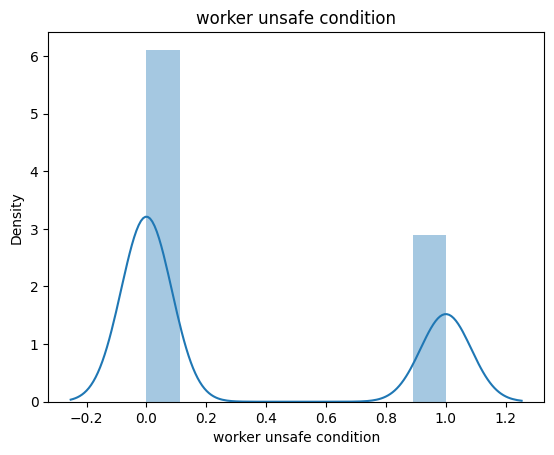

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("worker unsafe condition")
sns.distplot(new_state["worker unsafe condition"])

<ipython-input-11-c417b9a8511a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_behavior["worker unsafe act"])


<Axes: title={'center': 'worker unsafe act'}, xlabel='worker unsafe act', ylabel='Density'>

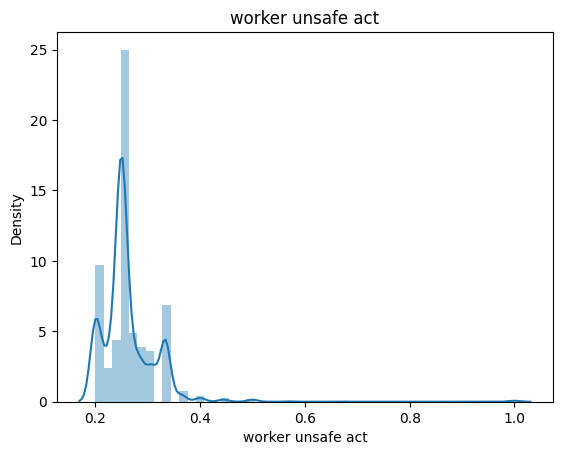

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("worker unsafe act")
sns.distplot(new_behavior["worker unsafe act"])

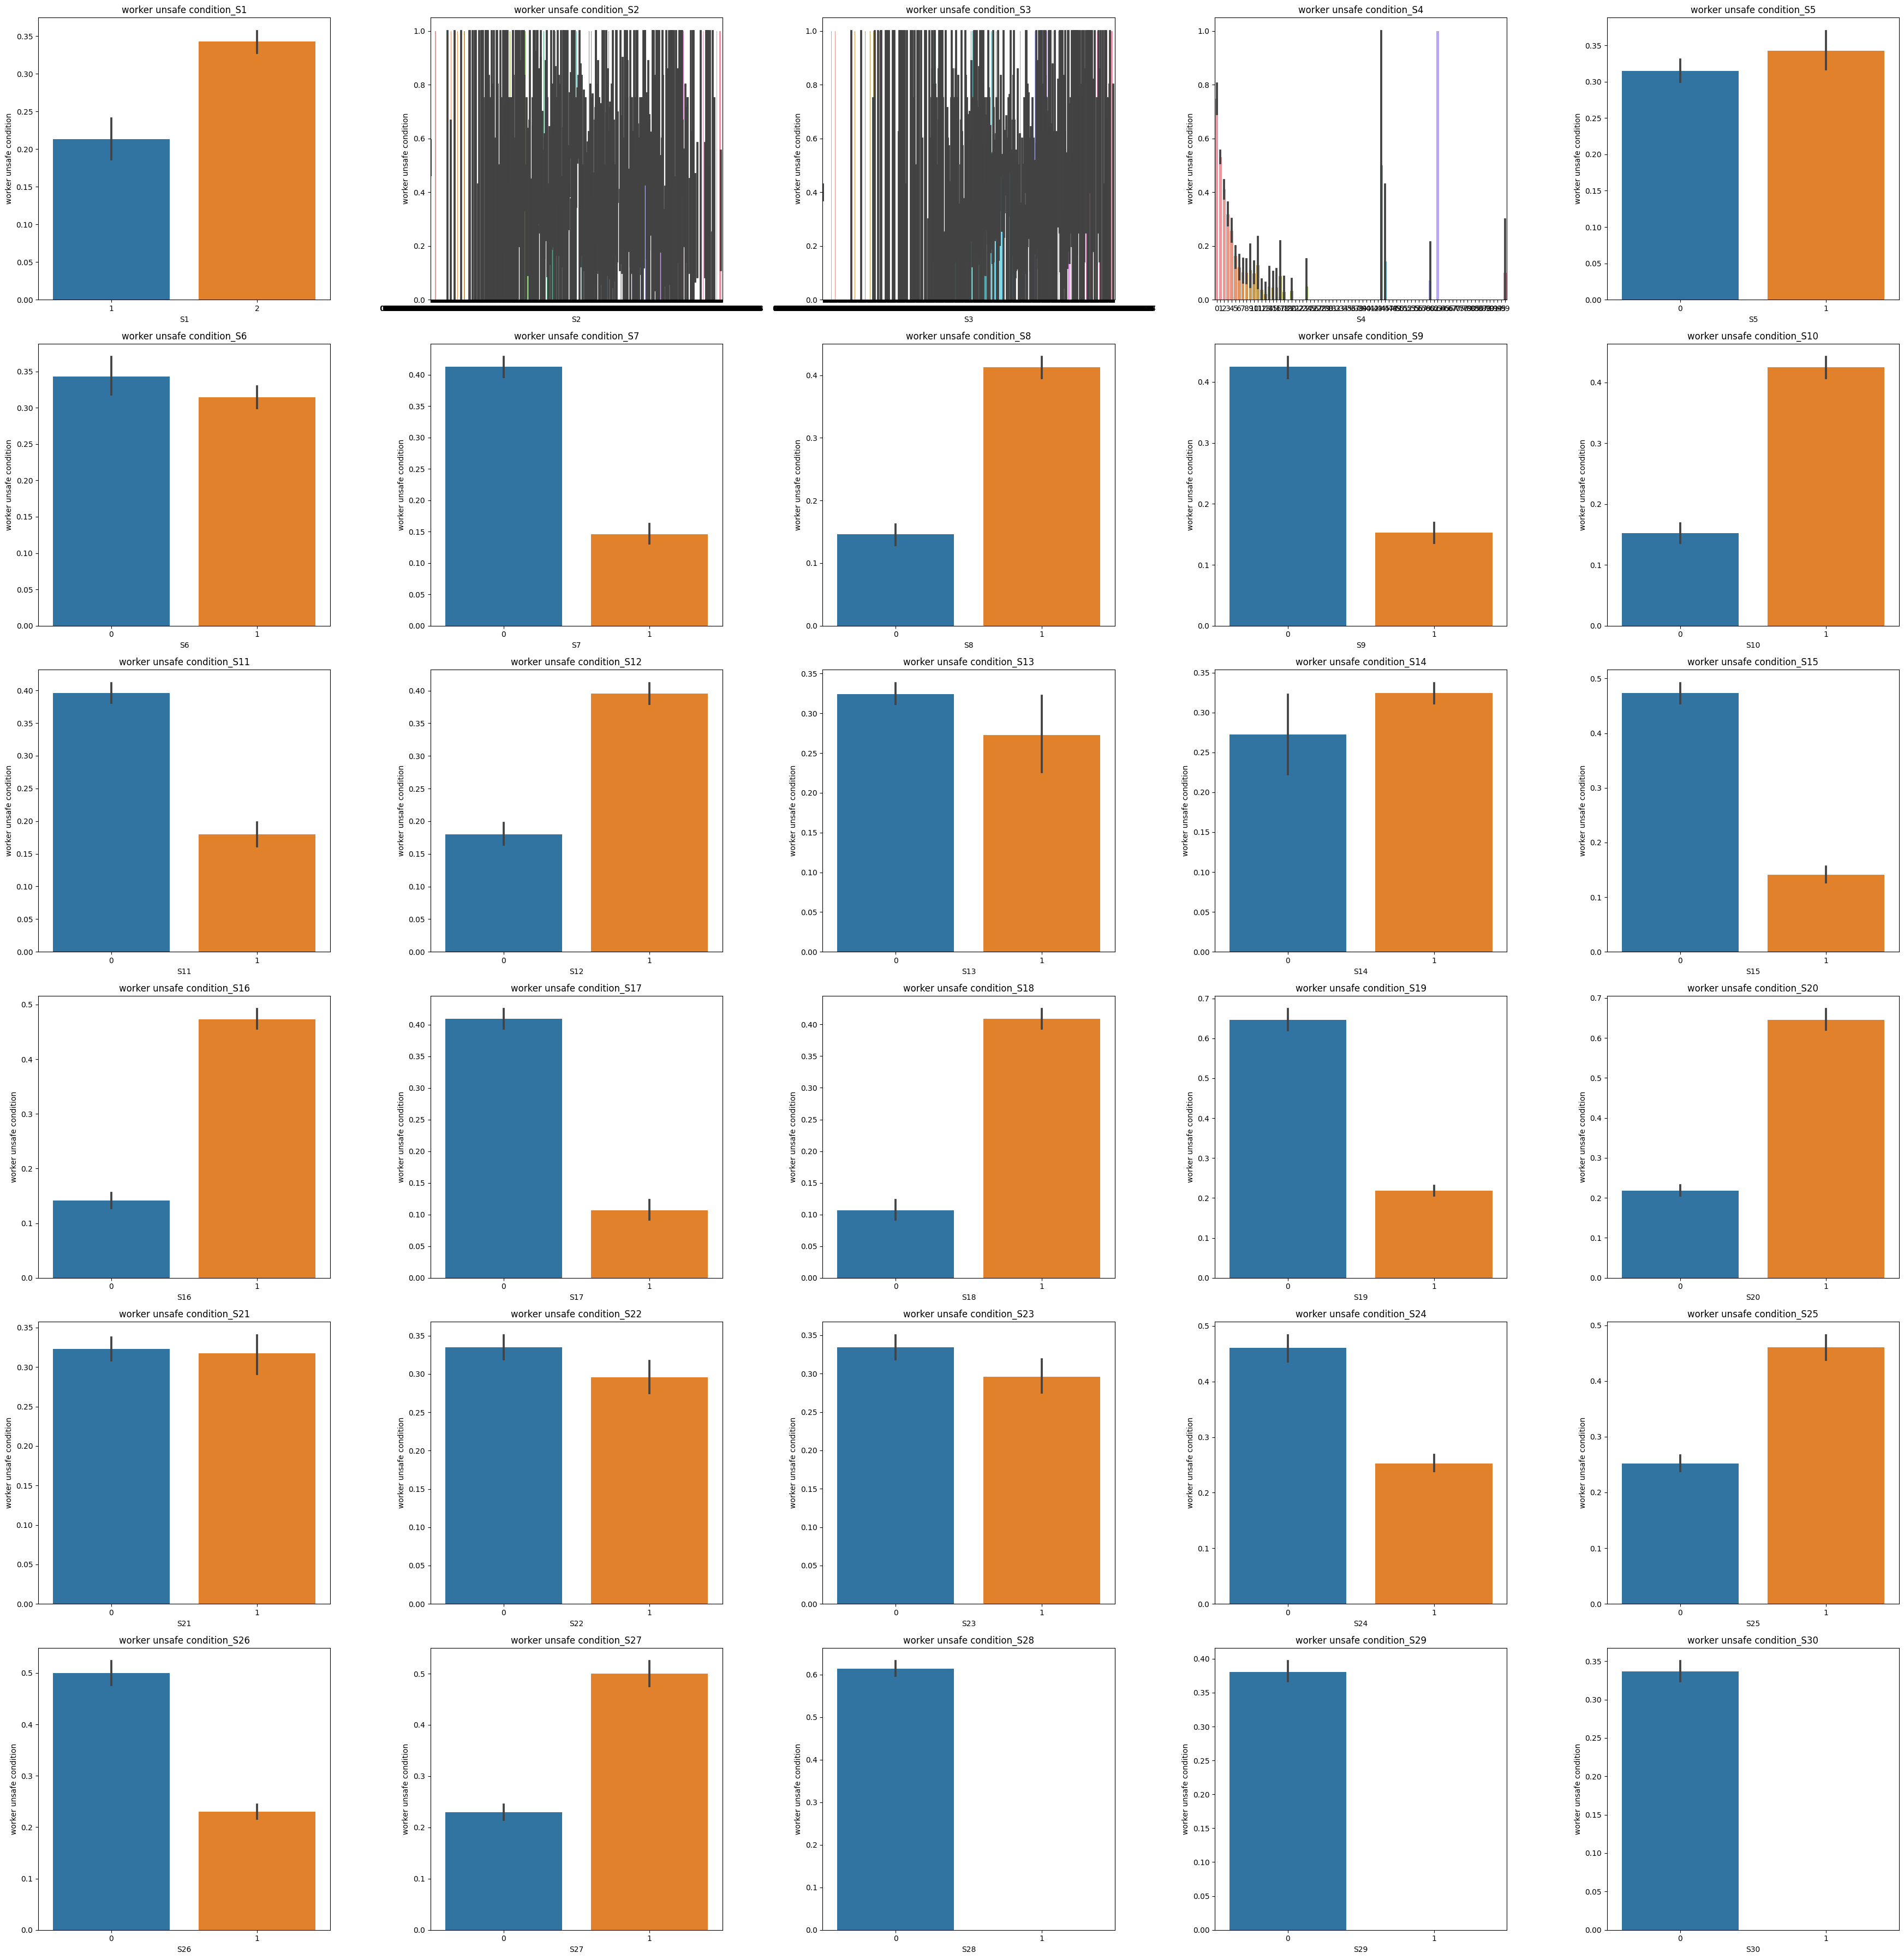

In [12]:
num_vars = len(X_state)  # 변수의 개수
num_rows = (num_vars + 4) // 5  # 행 개수 계산

# subplot 생성
figure, axes = plt.subplots(nrows=num_rows, ncols=5)
figure.set_size_inches(35, num_rows * 6)  # subplot 크기 조정

# 변수에 대한 반복문 수행
for i, state in enumerate(X_state):
    row = i // 5  # 행 인덱스
    col = i % 5  # 열 인덱스
    ax = axes[row, col]  # 해당 위치의 서브플롯

    # barplot 그리기
    sns.barplot(data=new_state, x=state, y="worker unsafe condition", ax=ax)
    ax.set(xlabel=state, title=f"worker unsafe condition_{state}")

# 빈 서브플롯 삭제
for i in range(num_vars, num_rows * 5):
    row = i // 5  # 행 인덱스
    col = i % 5  # 열 인덱스
    figure.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

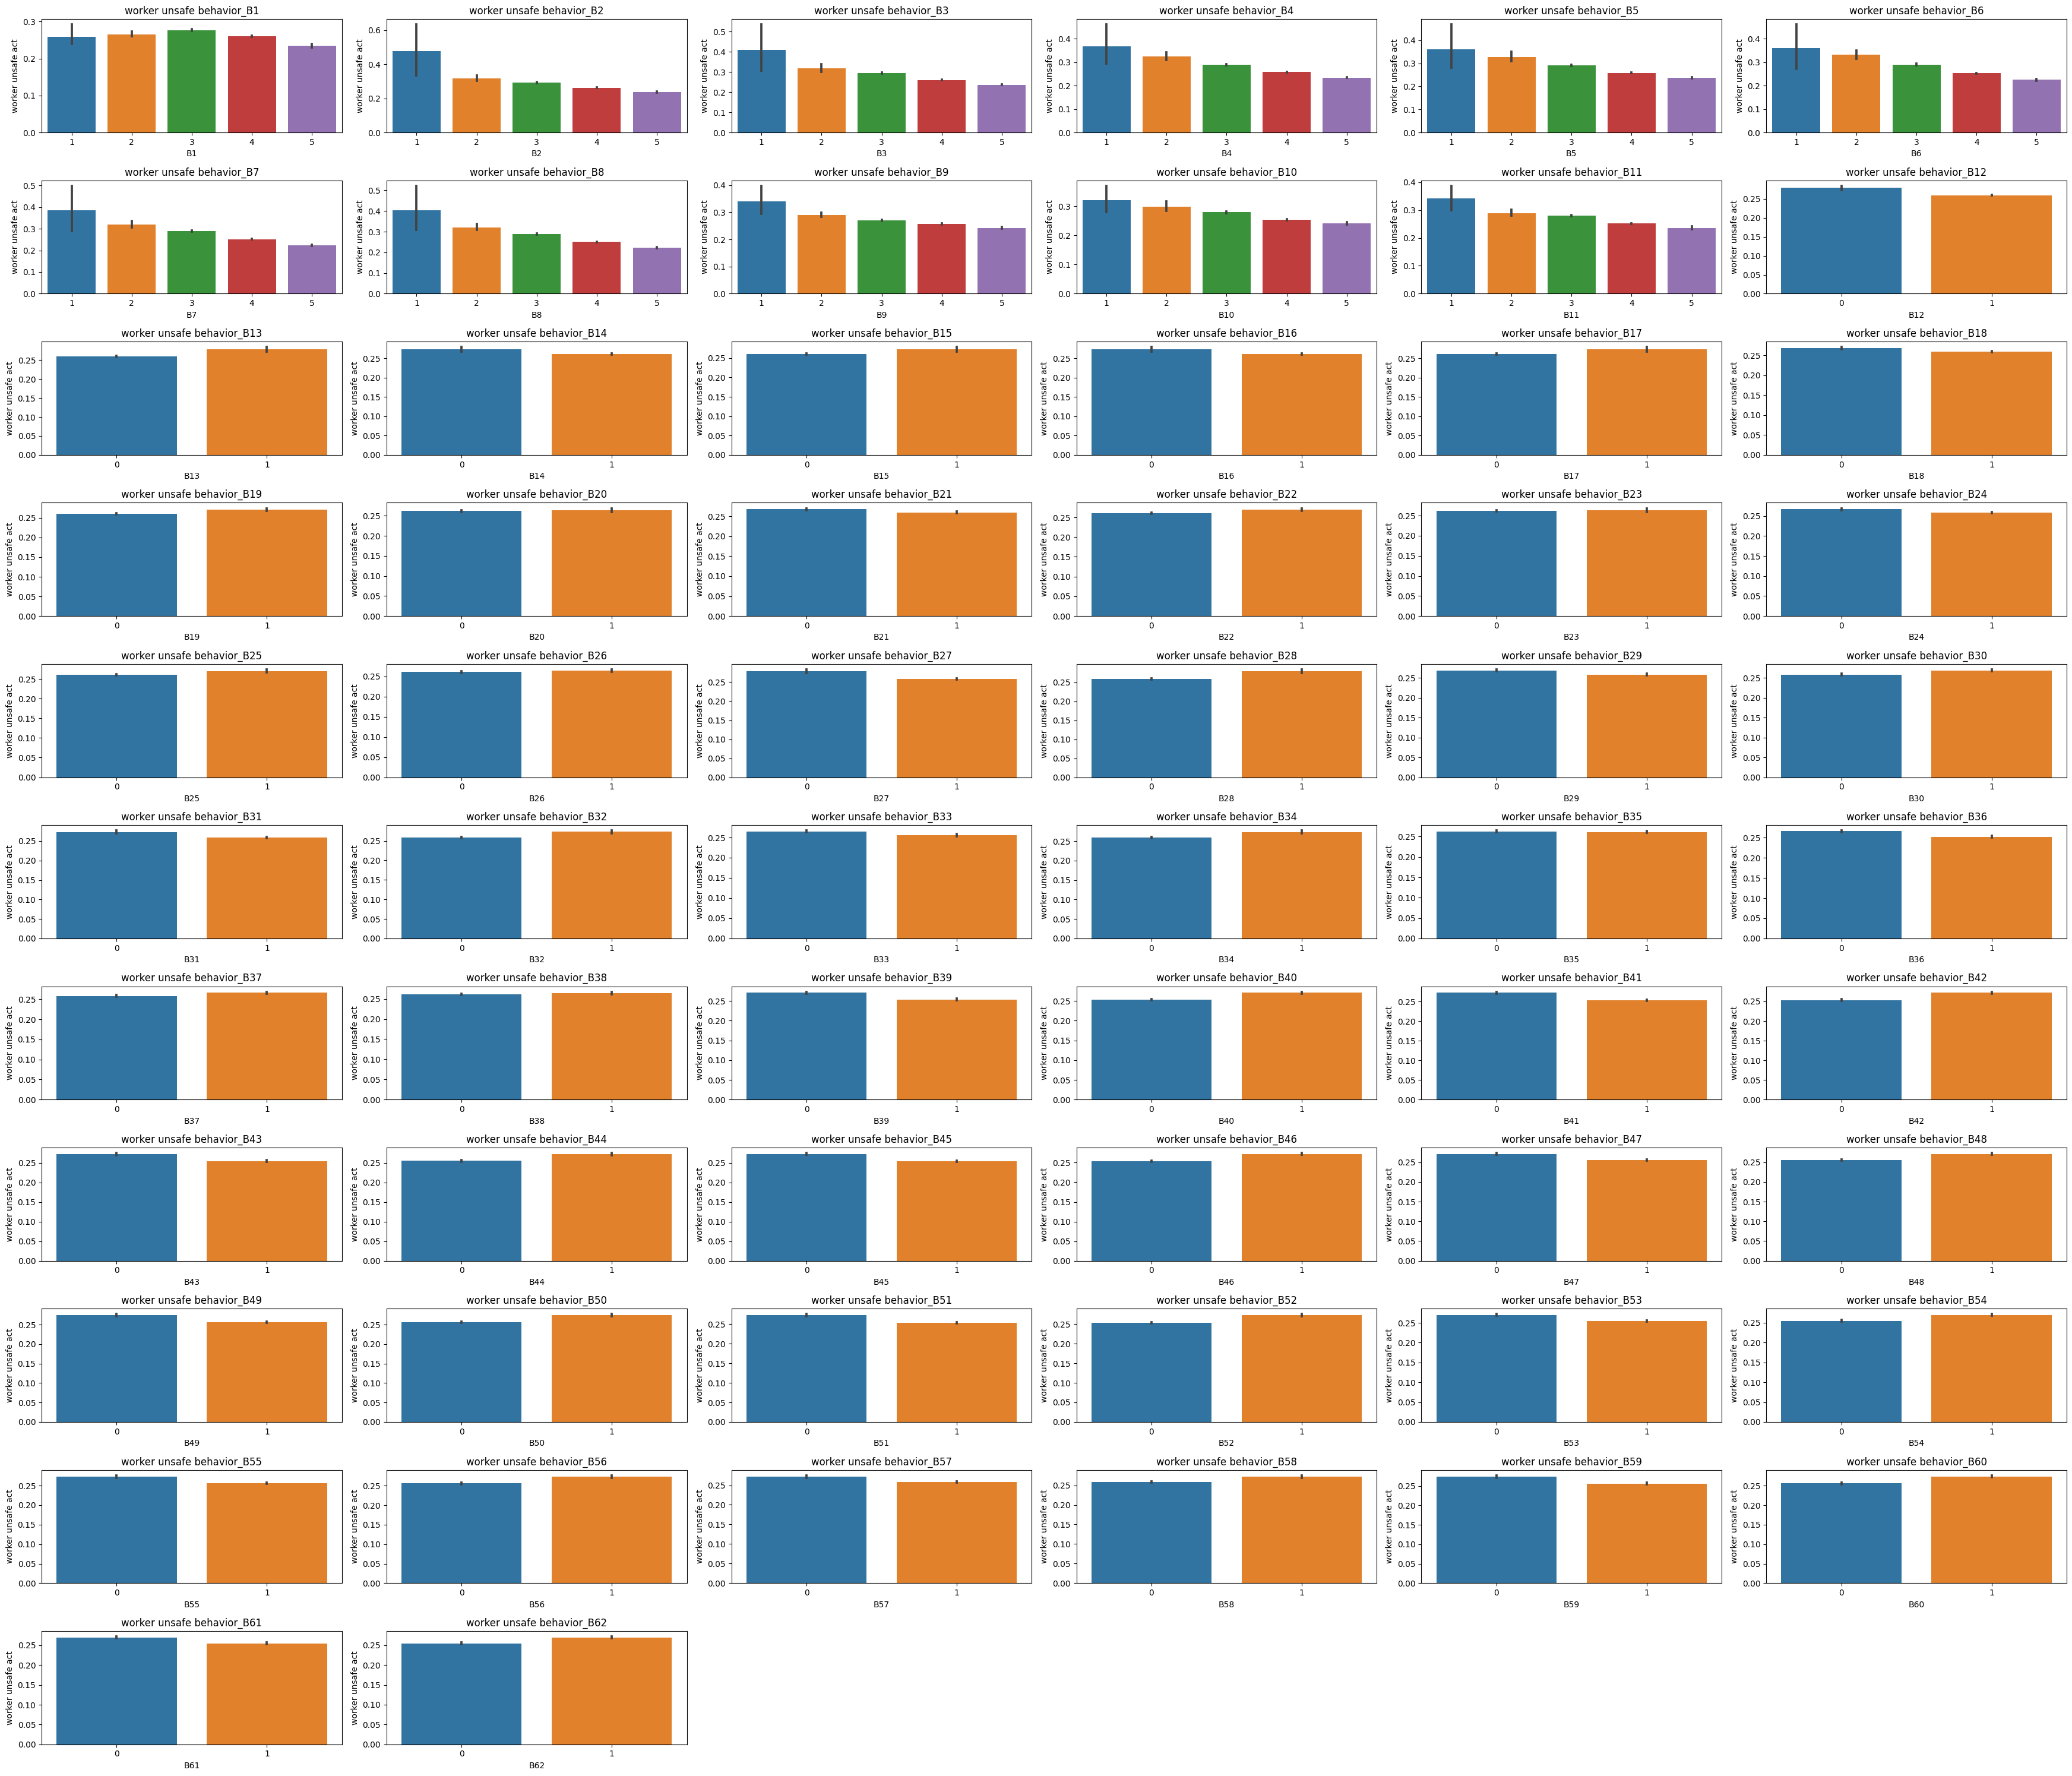

In [13]:
figure, axes = plt.subplots(nrows=11, ncols=6)
figure.set_size_inches(35, 30)

# X_behavior에 대해 반복문 수행
for i, behavior in enumerate(X_behavior):
    row = i // 6  # 행 인덱스
    col = i % 6  # 열 인덱스
    ax = axes[row, col]  # 해당 위치의 서브플롯

    # barplot 그리기
    sns.barplot(data=new_behavior, x=behavior, y="worker unsafe act", ax=ax)
    ax.set(xlabel=behavior, title=f"worker unsafe behavior_{behavior}")

# 빈 서브플롯 삭제
for i in range(len(X_behavior), 11 * 6):
    row = i // 6  # 행 인덱스
    col = i % 6  # 열 인덱스
    figure.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# (1) 불안전행동에 대한 예측모델 만들기
## - regression (1)
##### linear, ridge, lasso

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_rmse(model):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

### 피쳐들의 상관관계 파악

In [15]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

X = new_behavior[new_behavior.columns[0:-1]]
y = new_behavior["worker unsafe act"]

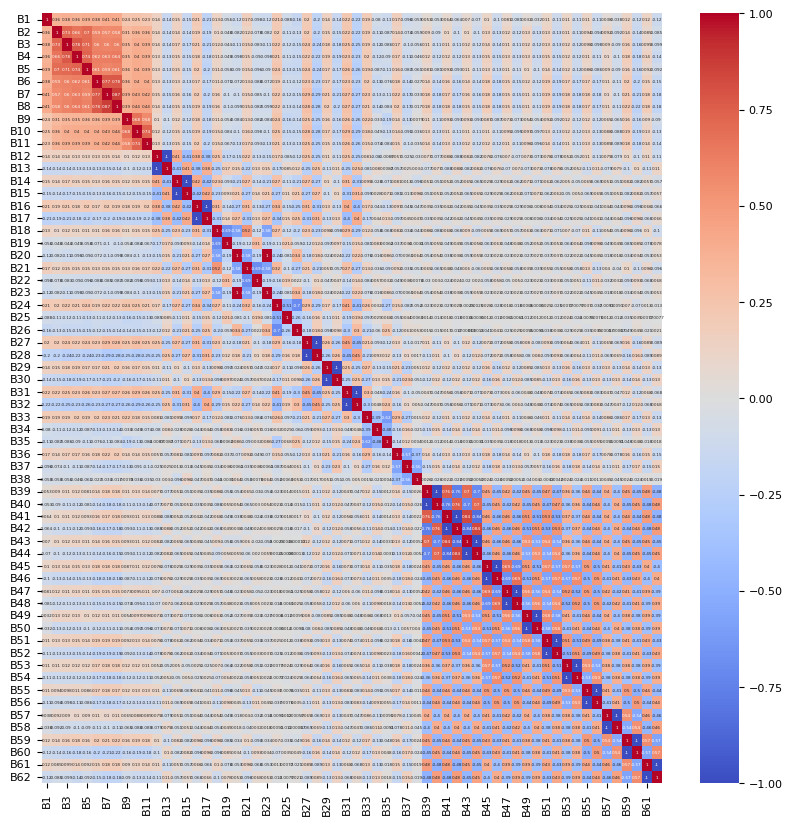

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피쳐들의 상관 행렬 계산
corr = X.corr()

# heatmap 함수를 사용하여 상관 행렬 시각화
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=8)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=8)  # y축 눈금 폰트 크기
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 3})  # annot_kws를 사용하여 annot의 폰트 크기 조정
plt.show()

###### ▶상관관계가 높은 변수들이 보임. 
- corr값이 B1,B2,B3,B4,B5,B6,B7,B8,B9,B10 을 변수 하나로 통합한다 => 총 53개의 독립변수
- 모델 설정시 Regularization(정규화)진행하기 (L1 또는 L2 정규화)

In [17]:
new_behavior['B1_B10'] = new_behavior[["B1", "B2", "B3", "B4", "B5", "B6", "B7",'B8','B9','B10']].mean(axis=1)
new_behavior.drop(["B1", "B2", "B3", "B4", "B5", "B6", "B7",'B8','B9','B10'], axis=1, inplace=True)

X['B1_B10'] =X[["B1", "B2", "B3", "B4", "B5", "B6", "B7",'B8','B9','B10']].mean(axis=1)
X.drop(["B1", "B2", "B3", "B4", "B5", "B6", "B7",'B8','B9','B10'], axis=1, inplace=True)


X

<ipython-input-17-f4c364ae8574>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['B1_B10'] =X[["B1", "B2", "B3", "B4", "B5", "B6", "B7",'B8','B9','B10']].mean(axis=1)
<ipython-input-17-f4c364ae8574>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["B1", "B2", "B3", "B4", "B5", "B6", "B7",'B8','B9','B10'], axis=1, inplace=True)


,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,...,B54,B55,B56,B57,B58,B59,B60,B61,B62,B1_B10
0,3,1,0,1,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,3.3
1,4,1,0,1,0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,1,4.3
2,4,1,0,1,0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,1,4.7
3,4,1,0,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,5.0
4,3,1,0,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,3,1,0,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,0,3.0
5215,3,1,0,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,3.7
5216,3,1,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,2.6
5217,1,1,0,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,3.4


### 상관관계 재시각화

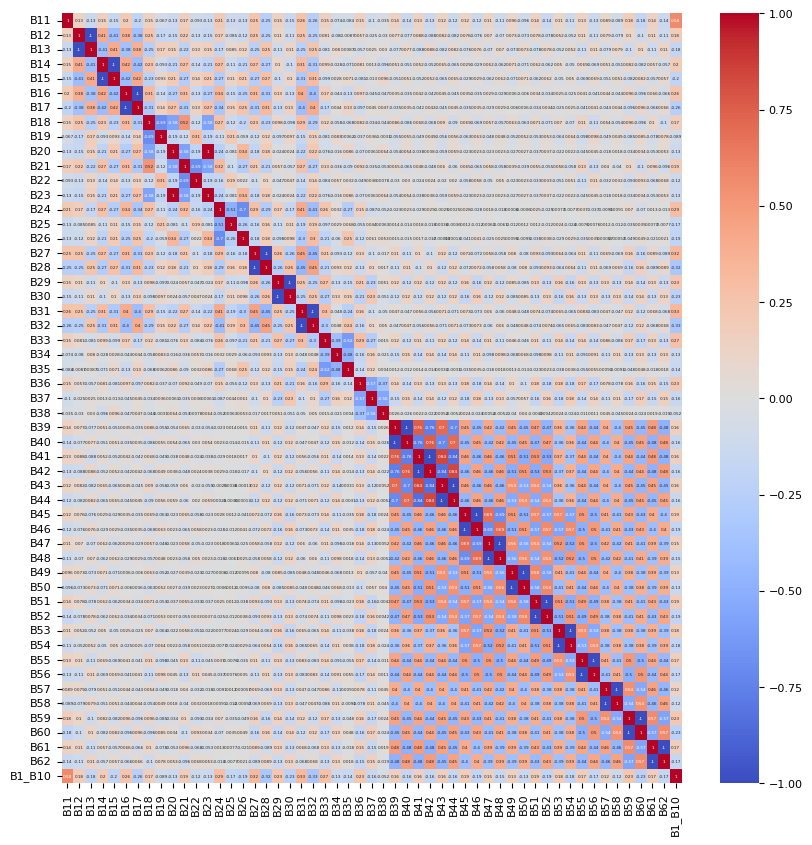

In [18]:
# 피쳐들의 상관 행렬 계산
corr = X.corr()

# heatmap 함수를 사용하여 상관 행렬 시각화
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=8)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=8)  # y축 눈금 폰트 크기
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 3})  # annot_kws를 사용하여 annot의 폰트 크기 조정
plt.show()

상관관계가 개선됨 

### 정규화 및 train/test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 추후 coef를 구해서 feature importance를 구할때 수치형 변수를 정규화해서 coef에 대한 영향력을 일정하게 함

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 회귀 모델의 학습/예측/평가

In [20]:

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001) # 라쏘는 weight들의 절대값의 합인 만큼 우선 0.05로 알파값을 설정
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 134896775075.783
Ridge 로그 변환된 RMSE: 0.125
Lasso 로그 변환된 RMSE: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


[134896775075.78287, 0.12527460292762893, 0.12010004433669541]

### feature importance 시각화 

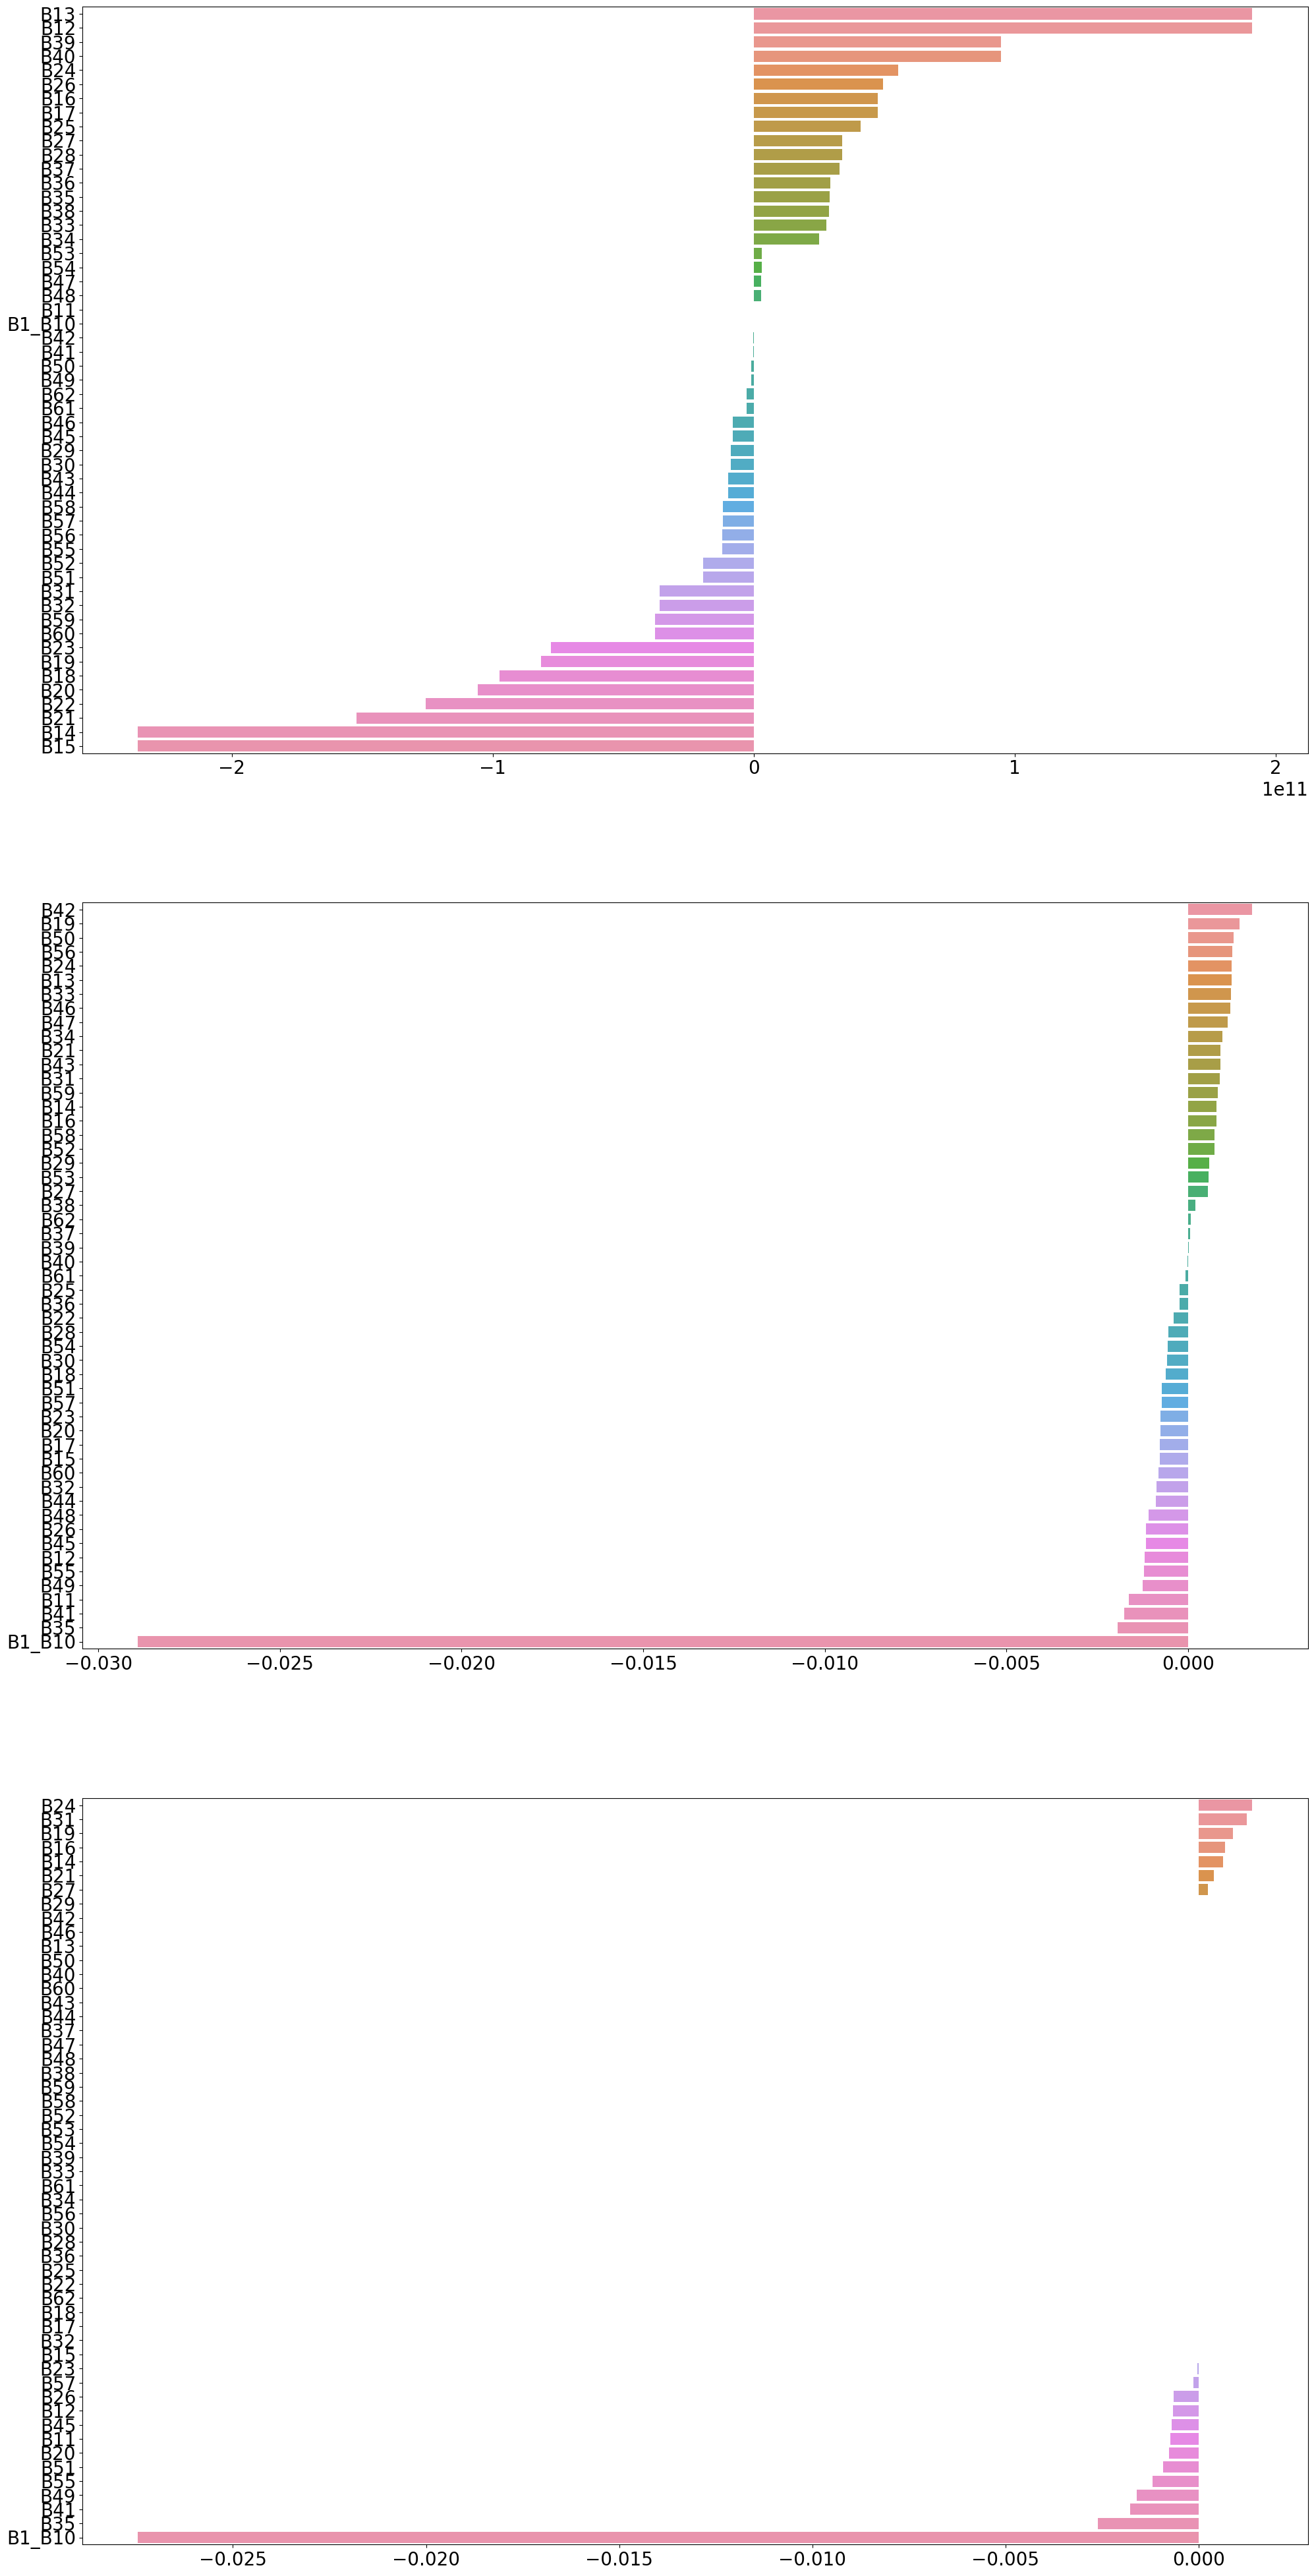

In [21]:
# 전체 feature 

def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index=X.columns)
    # + 상위 5개 , - 하위 5개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(5)
    coef_low = coef.sort_values(ascending=False).tail(5)
    return coef_high, coef_low

def get_coef(model, i):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)[:]
    plt.subplot(3, 1, i+1)
    sns.barplot(x=coef_sort.values , y=coef_sort.index)
    
models = [lr_reg, ridge_reg, lasso_reg]

fig = plt.figure(figsize=(24,50))
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기

for i, model in enumerate(models):
    get_coef(model, i)
# Autogluon

In [22]:
lasso_reg.coef_

array([-7.36382126e-04, -6.58156159e-04,  3.64705072e-19,  6.31883573e-04,
       -3.03920894e-18,  6.80050296e-04, -7.29410145e-19, -0.00000000e+00,
        8.91806305e-04, -7.73018631e-04,  3.90555325e-04, -0.00000000e+00,
       -4.28944094e-05,  1.38601989e-03, -0.00000000e+00, -6.50491419e-04,
        2.45583384e-04, -0.00000000e+00,  4.30203048e-06, -0.00000000e+00,
        1.24890734e-03, -1.45882029e-18,  0.00000000e+00,  0.00000000e+00,
       -2.60450094e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.77755883e-03,  9.72546860e-19,
       -0.00000000e+00,  0.00000000e+00, -6.99422862e-04,  8.50978502e-19,
        0.00000000e+00, -0.00000000e+00, -1.59828298e-03,  2.43136715e-19,
       -9.20617192e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.19936010e-03,  0.00000000e+00, -1.32328274e-04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.74567845e-02])

### 상위, 하위 5개 feature importance 시각화 

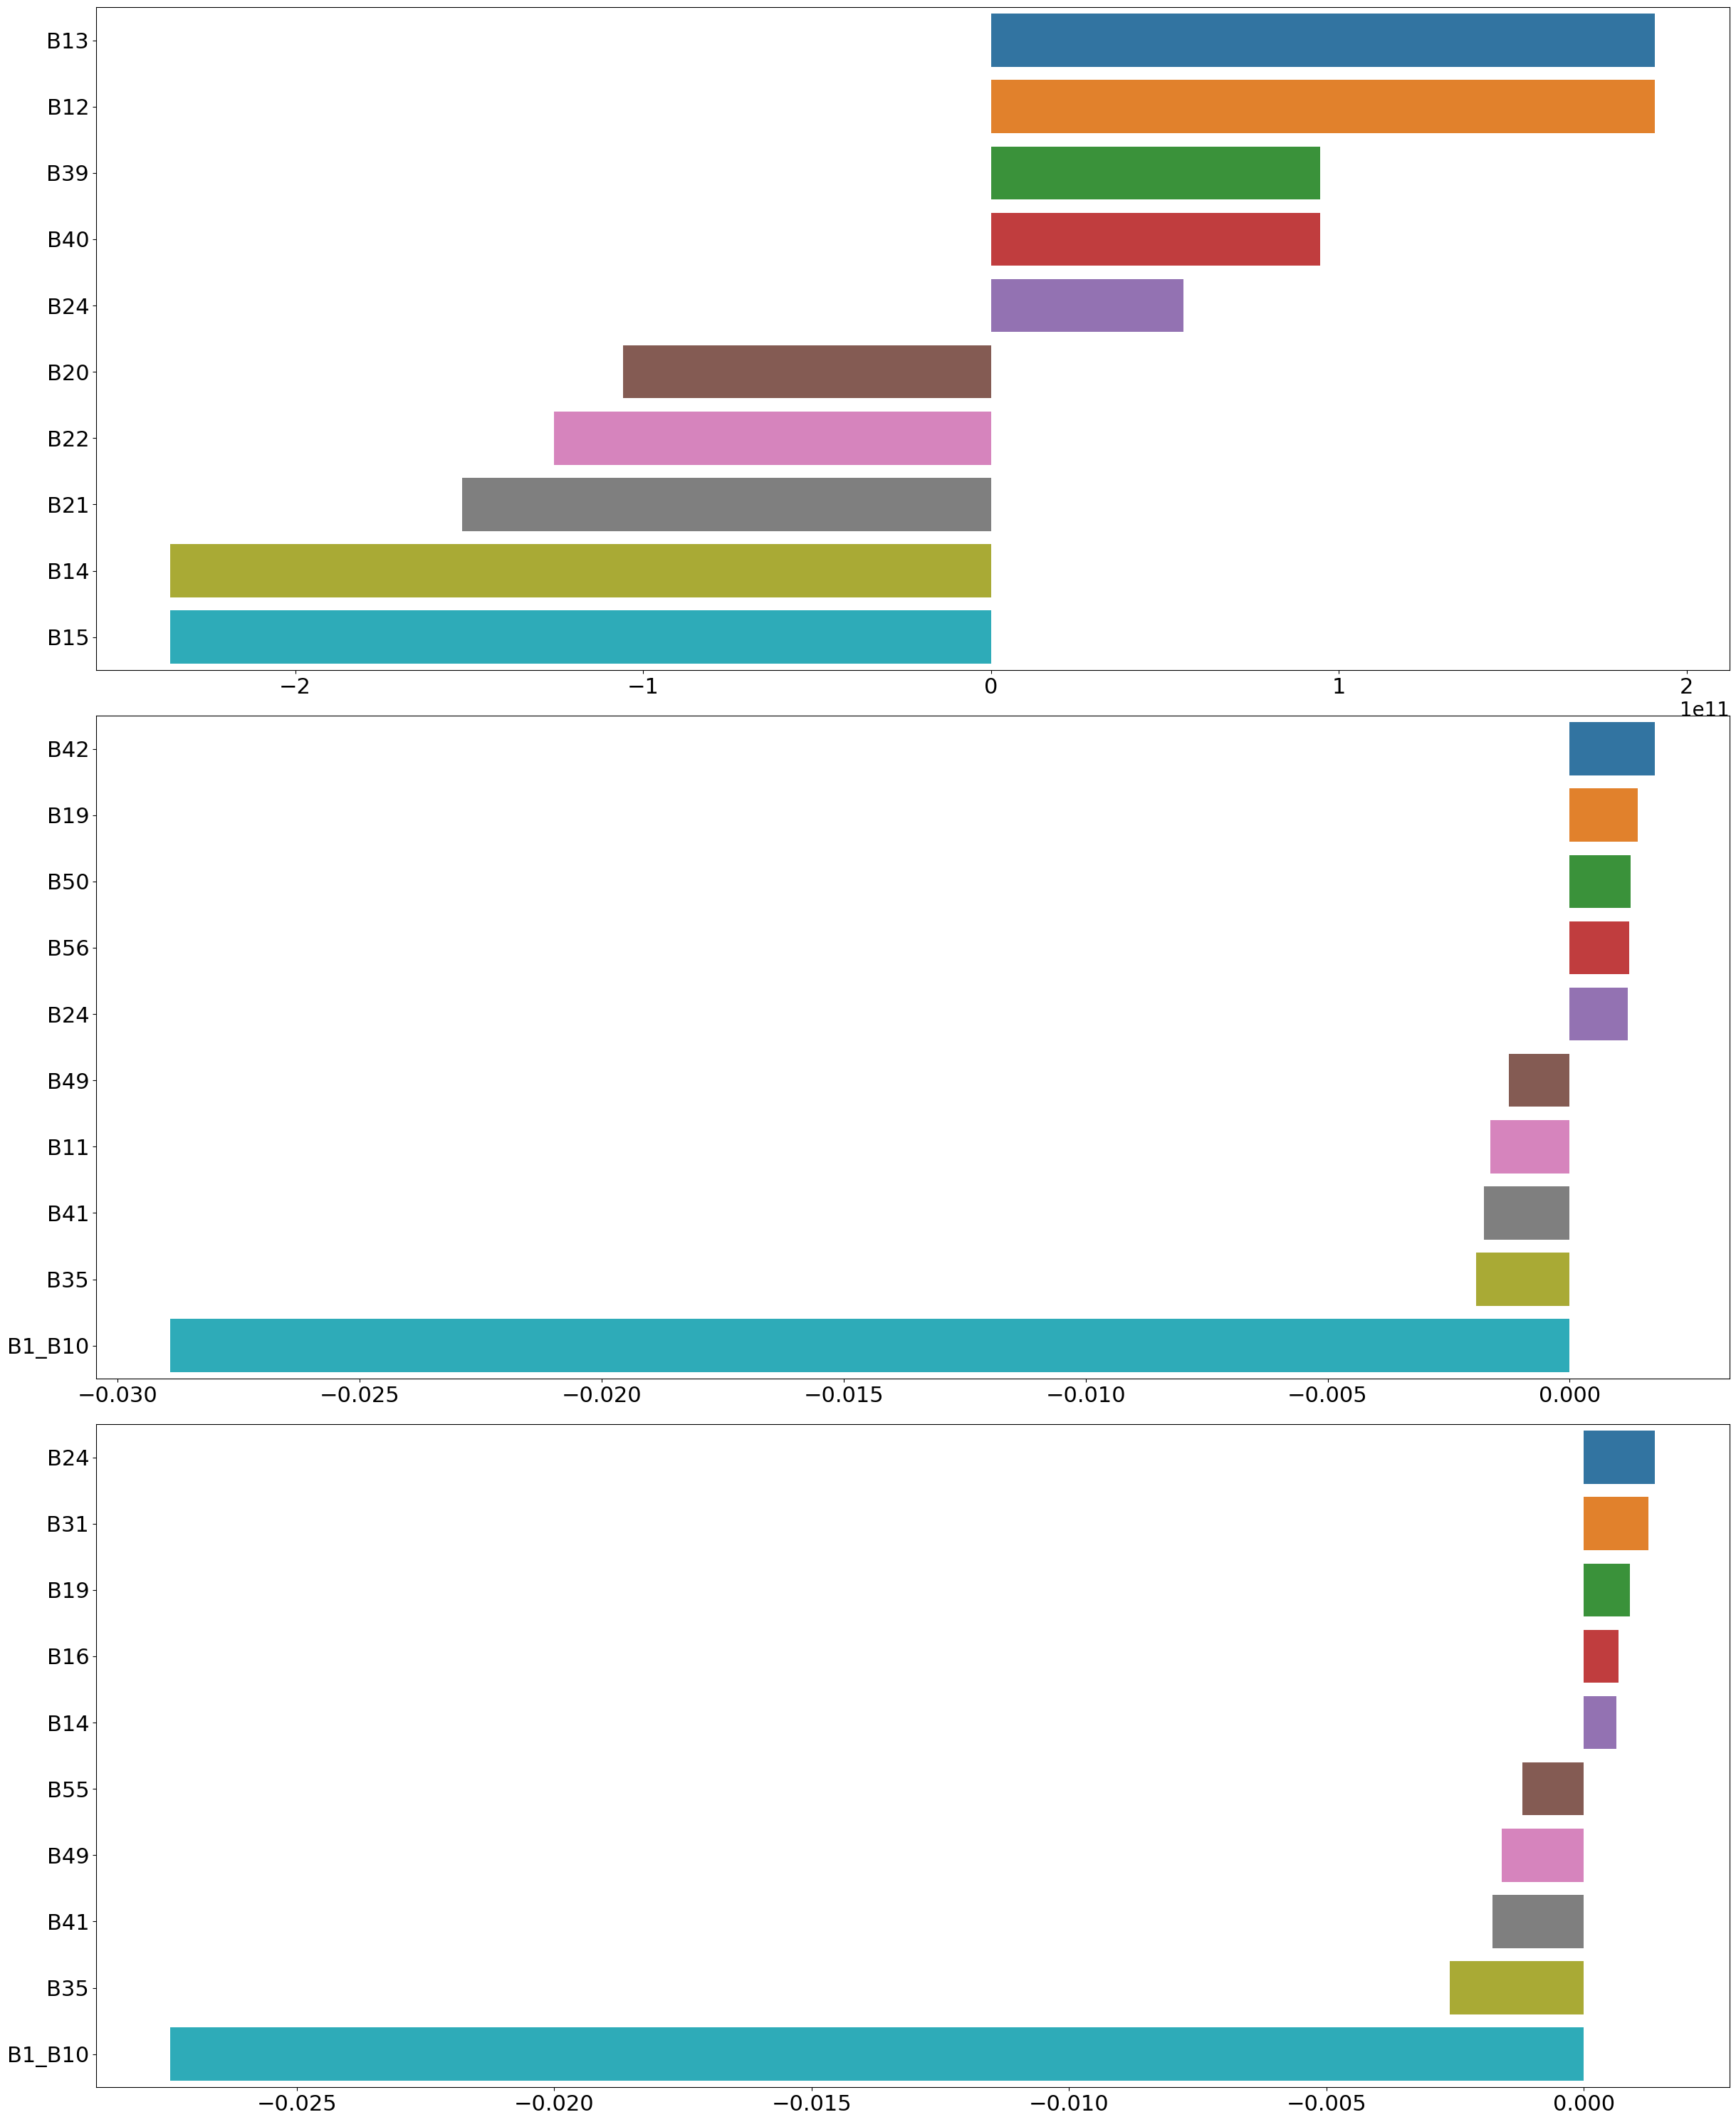

In [23]:
# 상위 영향력 5개, 하위 영향력 5개 feature 시각화

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화
    fig, axs = plt.subplots(figsize=(24,30),nrows=3, ncols=1)
    fig.tight_layout() 
    for i_num, model in enumerate(models):
        # 상위 5개, 하위 5개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        #axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        #axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### k-fold cross-validation

In [24]:
# k = 5 로 진행함

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X, y,
                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.039 0.043 0.046 0.063 0.047]
LinearRegression CV 평균 RMSE 값: 0.048

Ridge CV RMSE 값 리스트: [0.039 0.043 0.046 0.063 0.047]
Ridge CV 평균 RMSE 값: 0.048

Lasso CV RMSE 값 리스트: [0.039 0.043 0.046 0.063 0.047]
Lasso CV 평균 RMSE 값: 0.048


교차 검증 (Cross-validation)은 모델의 성능을 평가하고 일반화 오차를 추정하는 데 사용되는 중요한 기법입니다. 일반적으로 데이터를 훈련 세트와 테스트 세트로 나누어 모델을 훈련하고 평가하는 것이 일반적이지만, 이는 데이터를 효과적으로 사용하지 못할 수 있습니다. 교차 검증은 이러한 문제를 해결하기 위해 데이터를 더 효율적으로 사용하고 모델의 일반화 성능을 평가하는 데 사용됩니다.

교차 검증은 주어진 데이터를 여러 개의 폴드(fold)로 나누고, 각 폴드를 반복적으로 훈련 세트와 검증 세트로 사용하여 모델을 훈련하고 평가하는 과정입니다. 일반적으로 k-fold 교차 검증이 가장 많이 사용되며, 이는 데이터를 k개의 폴드로 나누고 각 폴드를 한 번씩 검증 세트로 사용하여 k번의 훈련과 평가를 수행합니다. 이렇게 여러 번의 훈련과 평가를 거쳐 얻은 성능 지표들을 평균내어 최종적인 모델의 성능을 평가합니다.

교차 검증을 사용하는 이유는 다음과 같습니다:

모델의 일반화 성능 추정: 교차 검증은 훈련 세트와 검증 세트를 반복적으로 나누어 모델을 훈련하고 평가하므로 모델의 일반화 성능을 더 정확하게 추정할 수 있습니다. 이는 모델이 새로운 데이터에 대해서도 얼마나 잘 일반화되는지를 파악할 수 있게 합니다.
과적합 감지: 교차 검증은 모델이 과적합(overfitting)되는지 여부를 파악할 수 있습니다. 과적합은 모델이 훈련 데이터에 너무 잘 맞지만 새로운 데이터에 대해서는 일반화 성능이 떨어지는 상황을 의미합니다. 교차 검증을 통해 여러 개의 검증 세트를 사용하여 모델을 평가하므로 과적합을 감지하고 이를 해결하는 방법을 찾을 수 있습니다.
데이터 활용 효율성: 교차 검증은 주어진 데이터를 효과적으로 활용할 수 있는 방법입니다. 모델을 학습하기 위해 데이터를 훈련 세트와 검증 세트로 나누는 과정을 반복하여 모든 데이터를 사용하여 모델을 학습하고 평가할 수 있습니다.
따라서, 교차 검증을 통해 모델의 성능을 정확하게 평가하고 일반화 오차를 추정할 수 있습니다. 이는 모델의 신뢰성을 높이고 새로운 데이터에 대한 예측 성능을 개선하는 데 도움을 줍니다.

### 하이퍼 파라미터 튜닝_GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.0001, 0.0005, 0.0008, 0.001, 0.01, 0.03, 0.1, 0.5, 1, 5] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0482, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0482, 최적 alpha:{'alpha': 0.0001}


LinearRegression 로그 변환된 RMSE: 134896775075.783
Ridge 로그 변환된 RMSE: 0.125
Lasso 로그 변환된 RMSE: 0.126


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


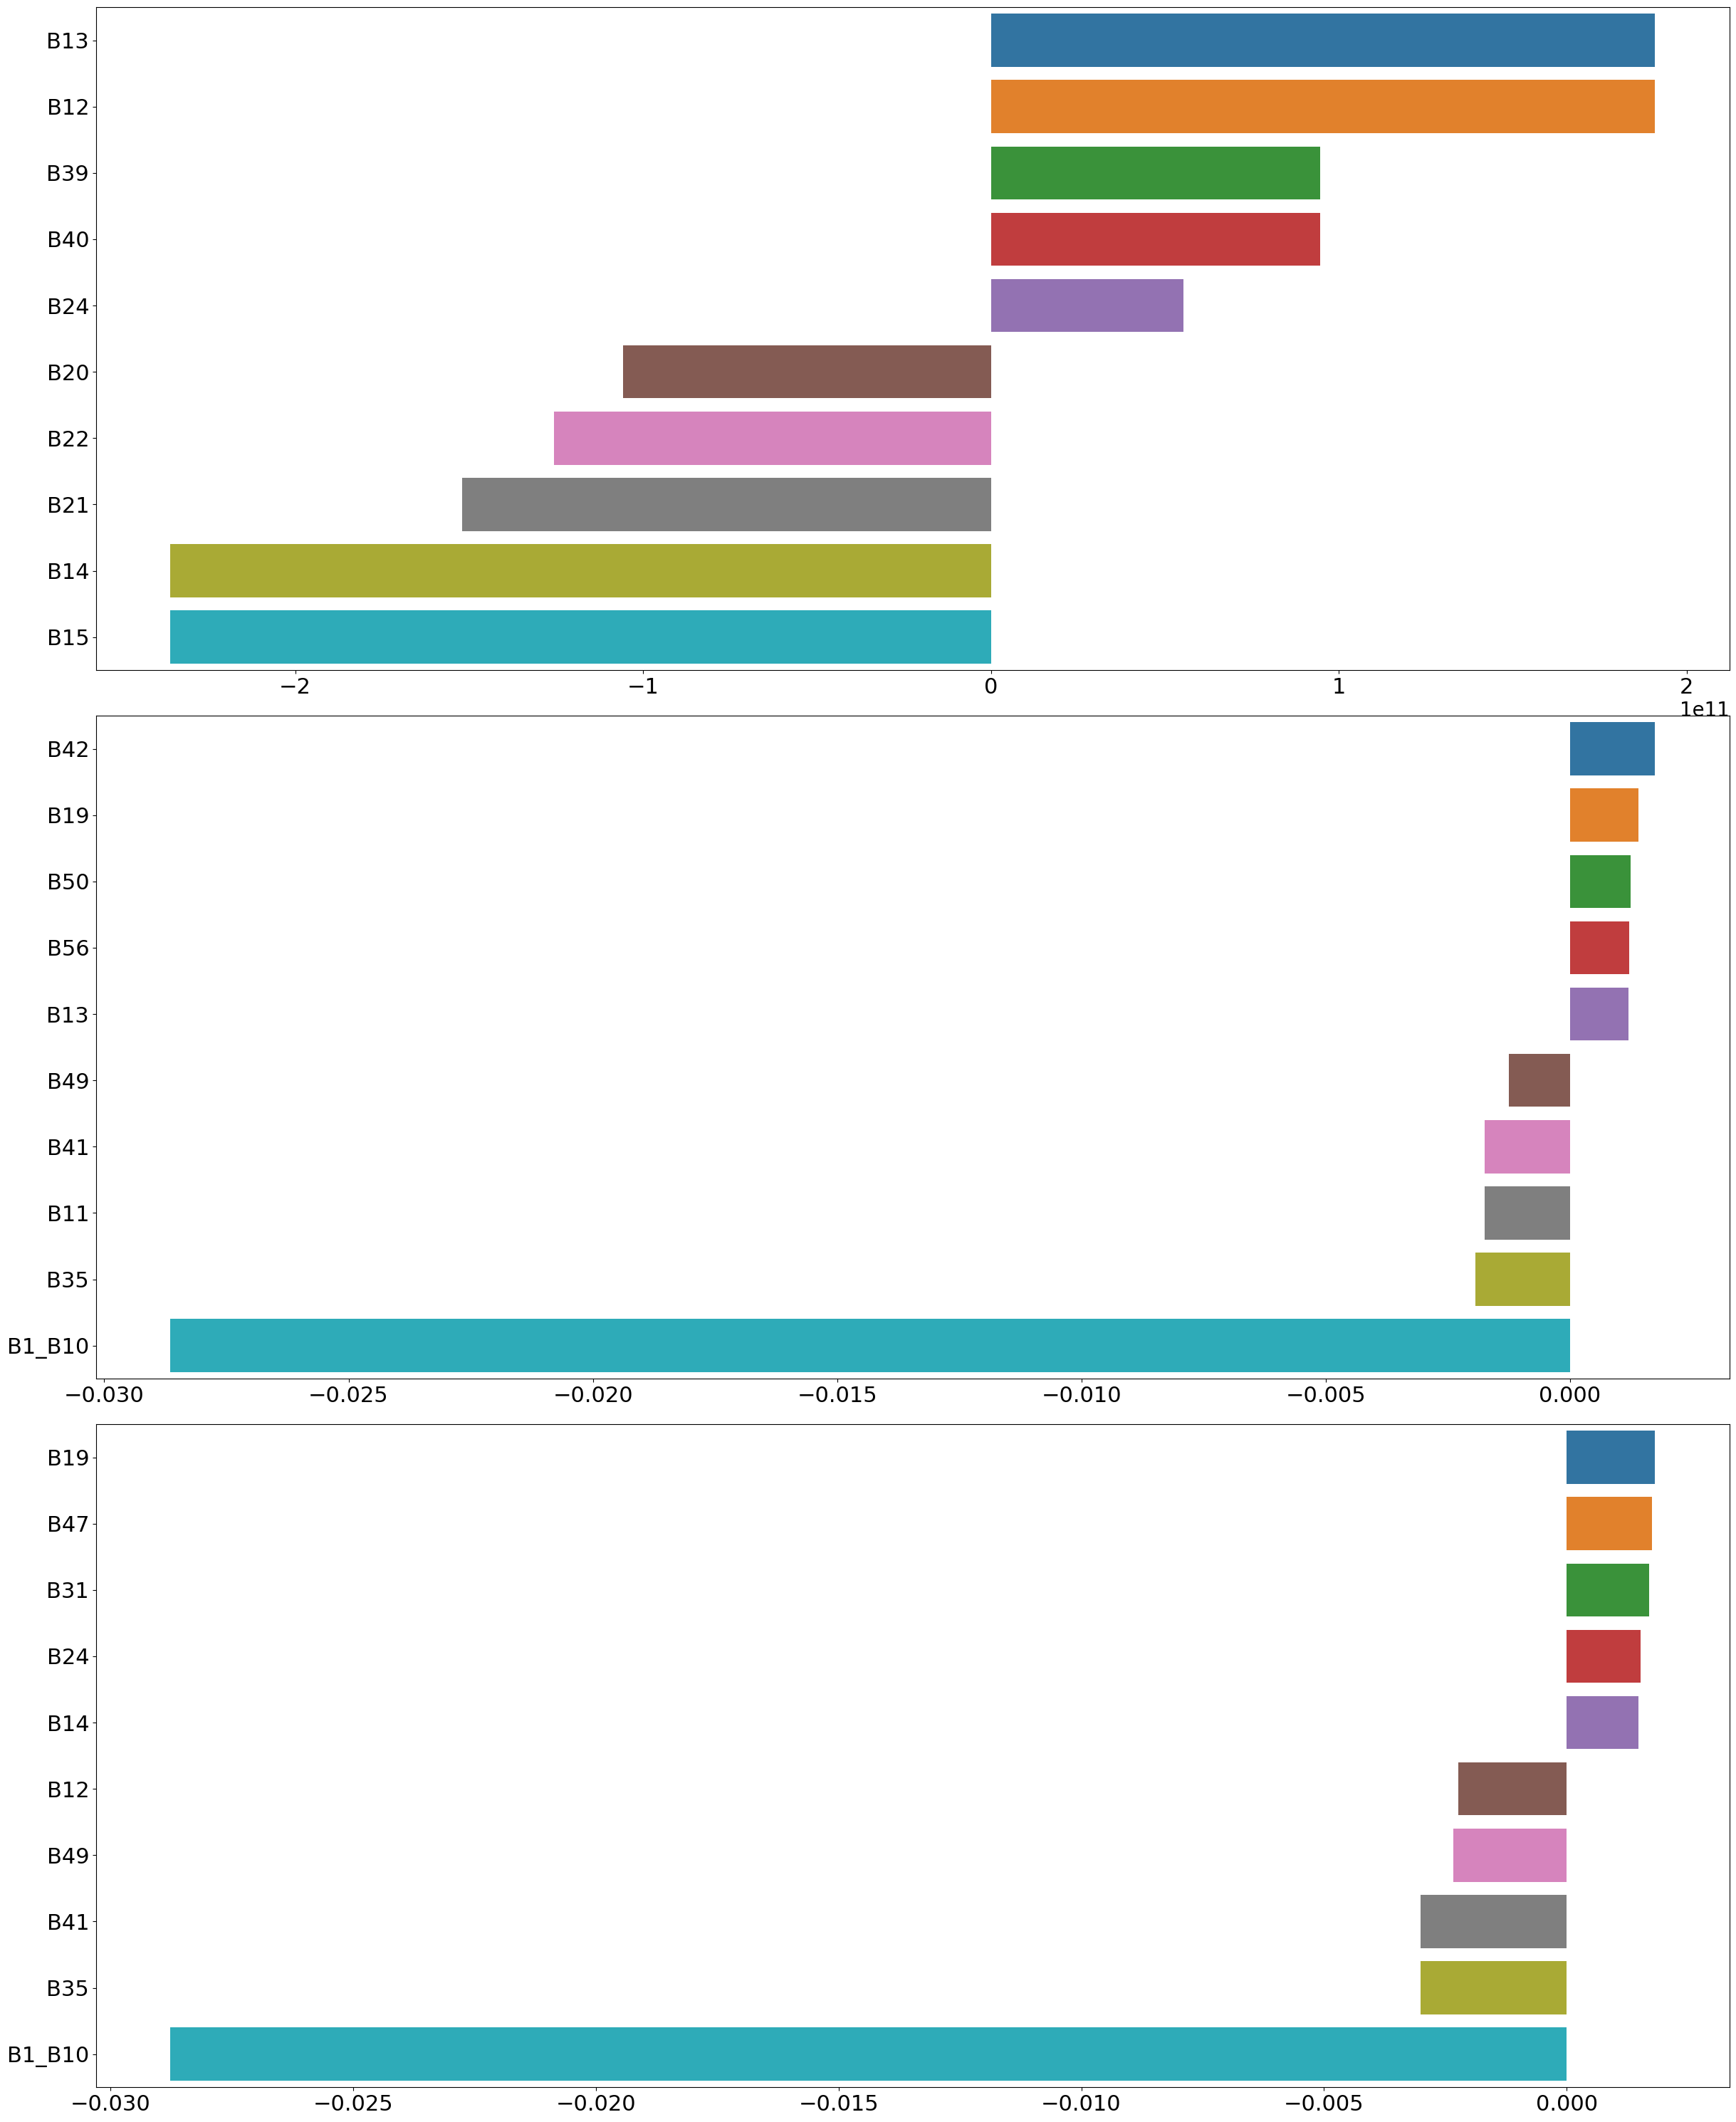

In [26]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]

visualize_coefficient(models)

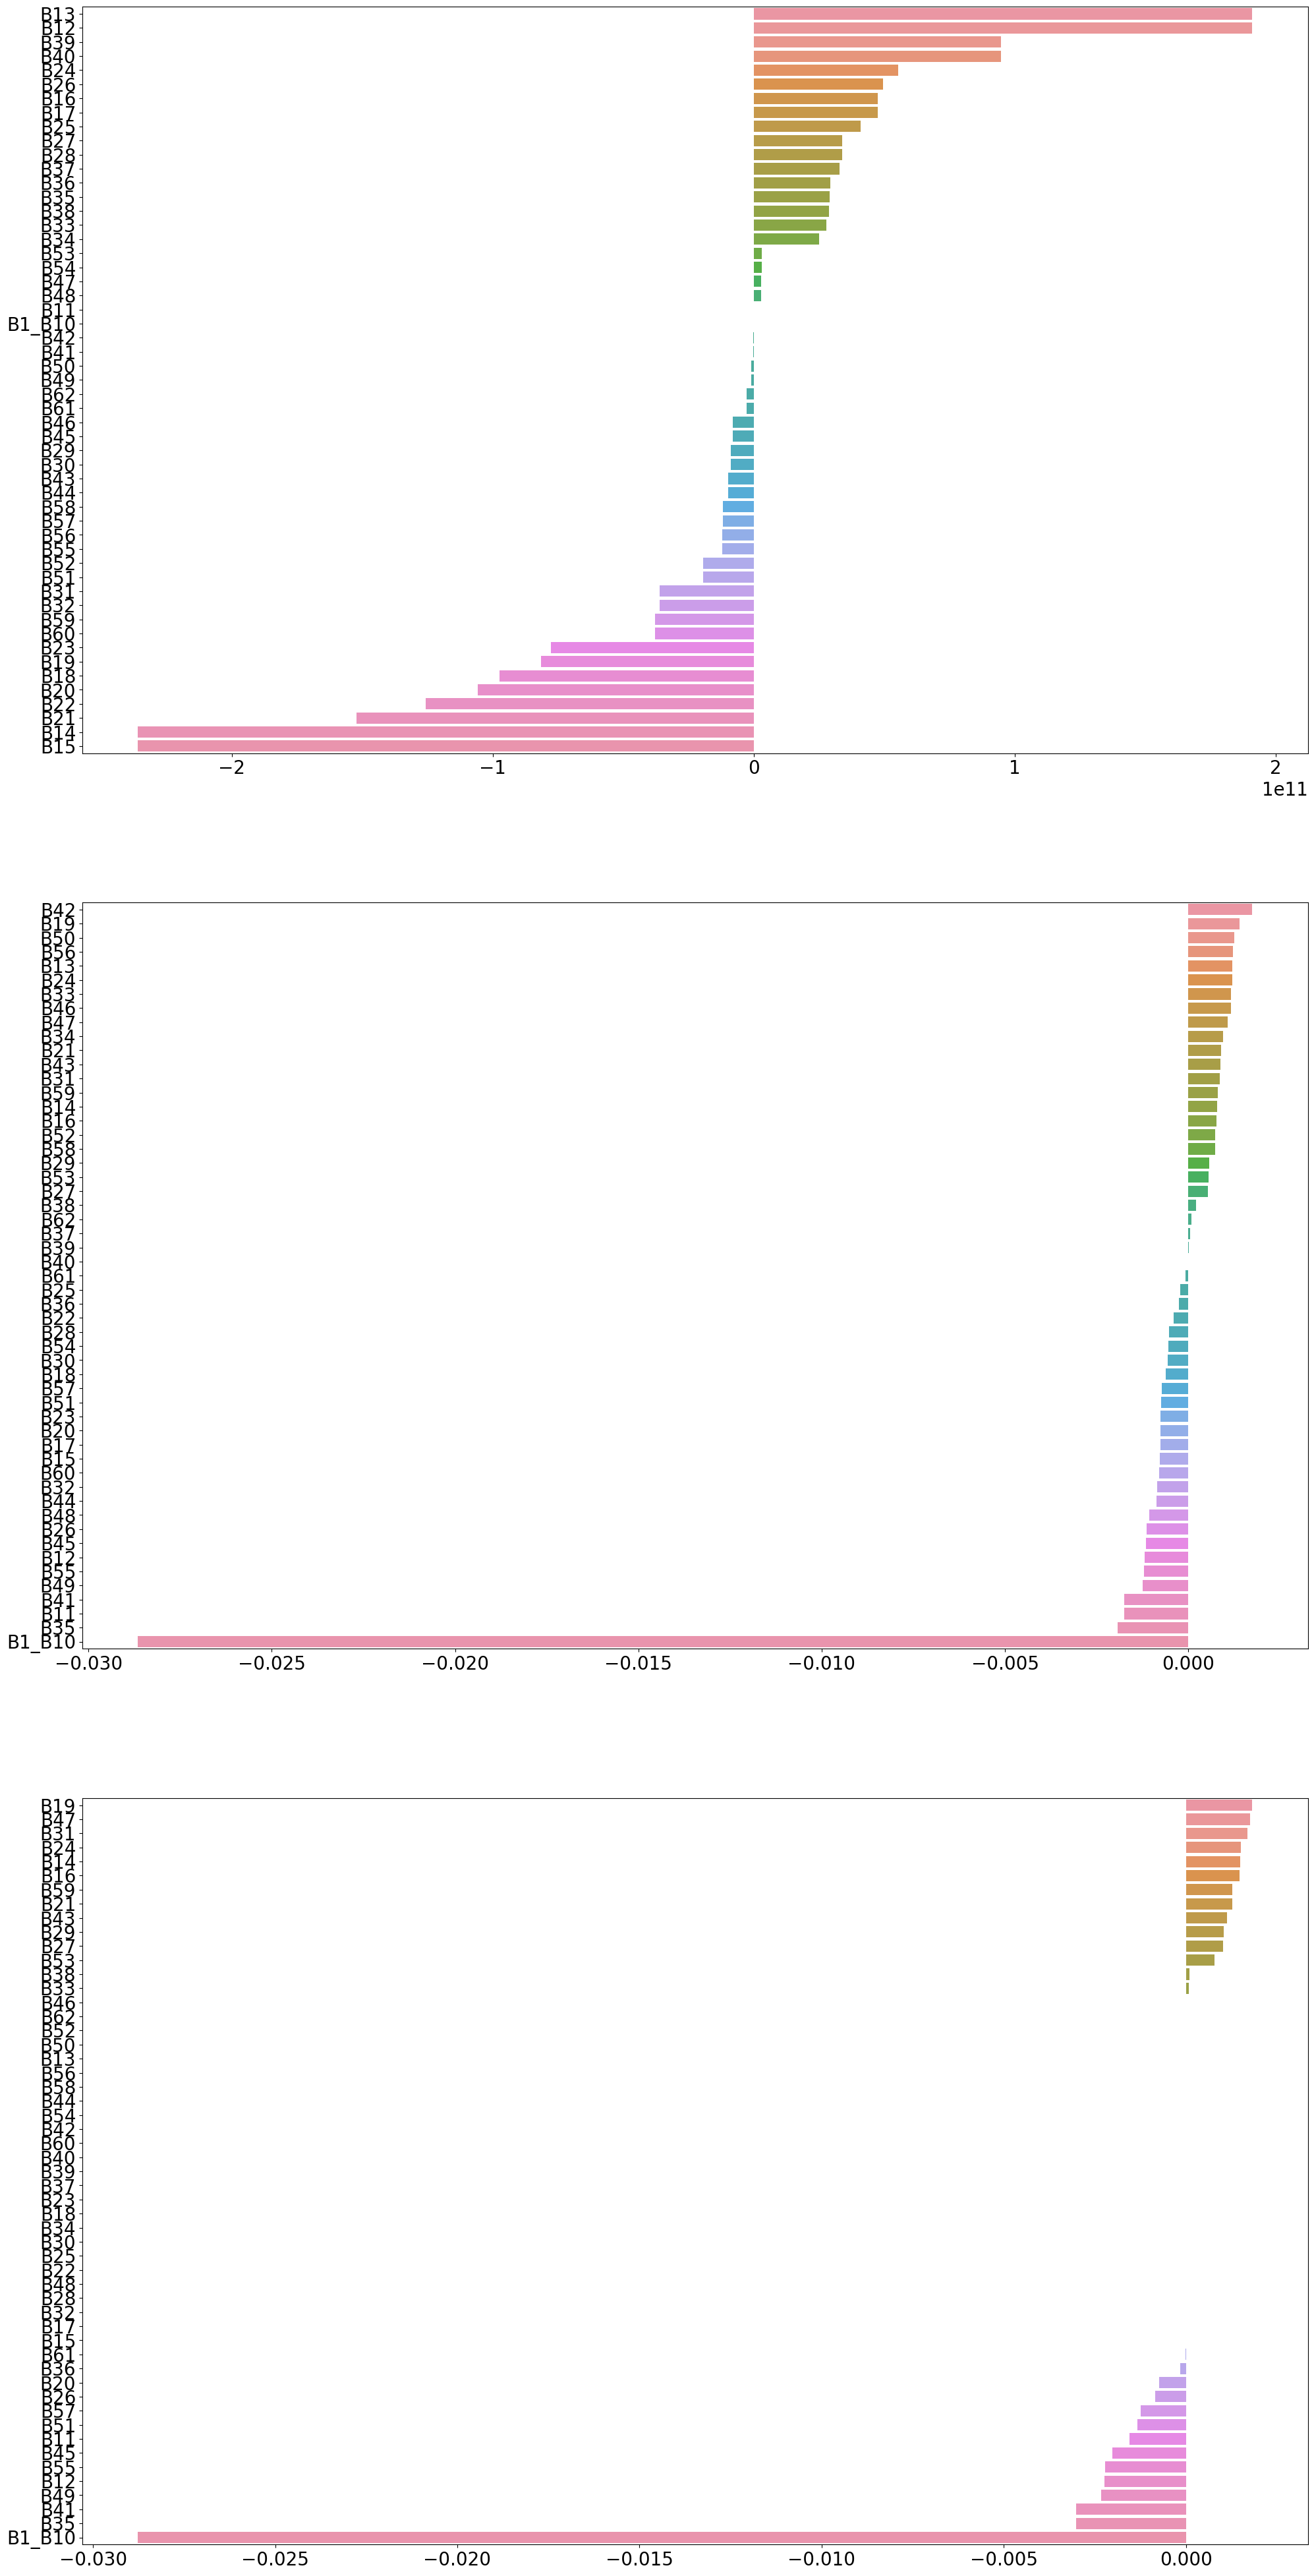

In [27]:
fig = plt.figure(figsize=(24,50))
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
for i, model in enumerate(models):     
    get_coef(model,i)

## - regression (2)
##### 회귀 트리 XGBRegressor, LGBMRegressor 학습/예측/평가

In [28]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[100, 500, 1000]}
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.0491, 최적 alpha:{'n_estimators': 100}


In [29]:
from lightgbm import LGBMRegressor
lgbm_params = {'n_estimators':[100, 500, 1000]}
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=4, 
                          subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.0482, 최적 alpha:{'n_estimators': 500}


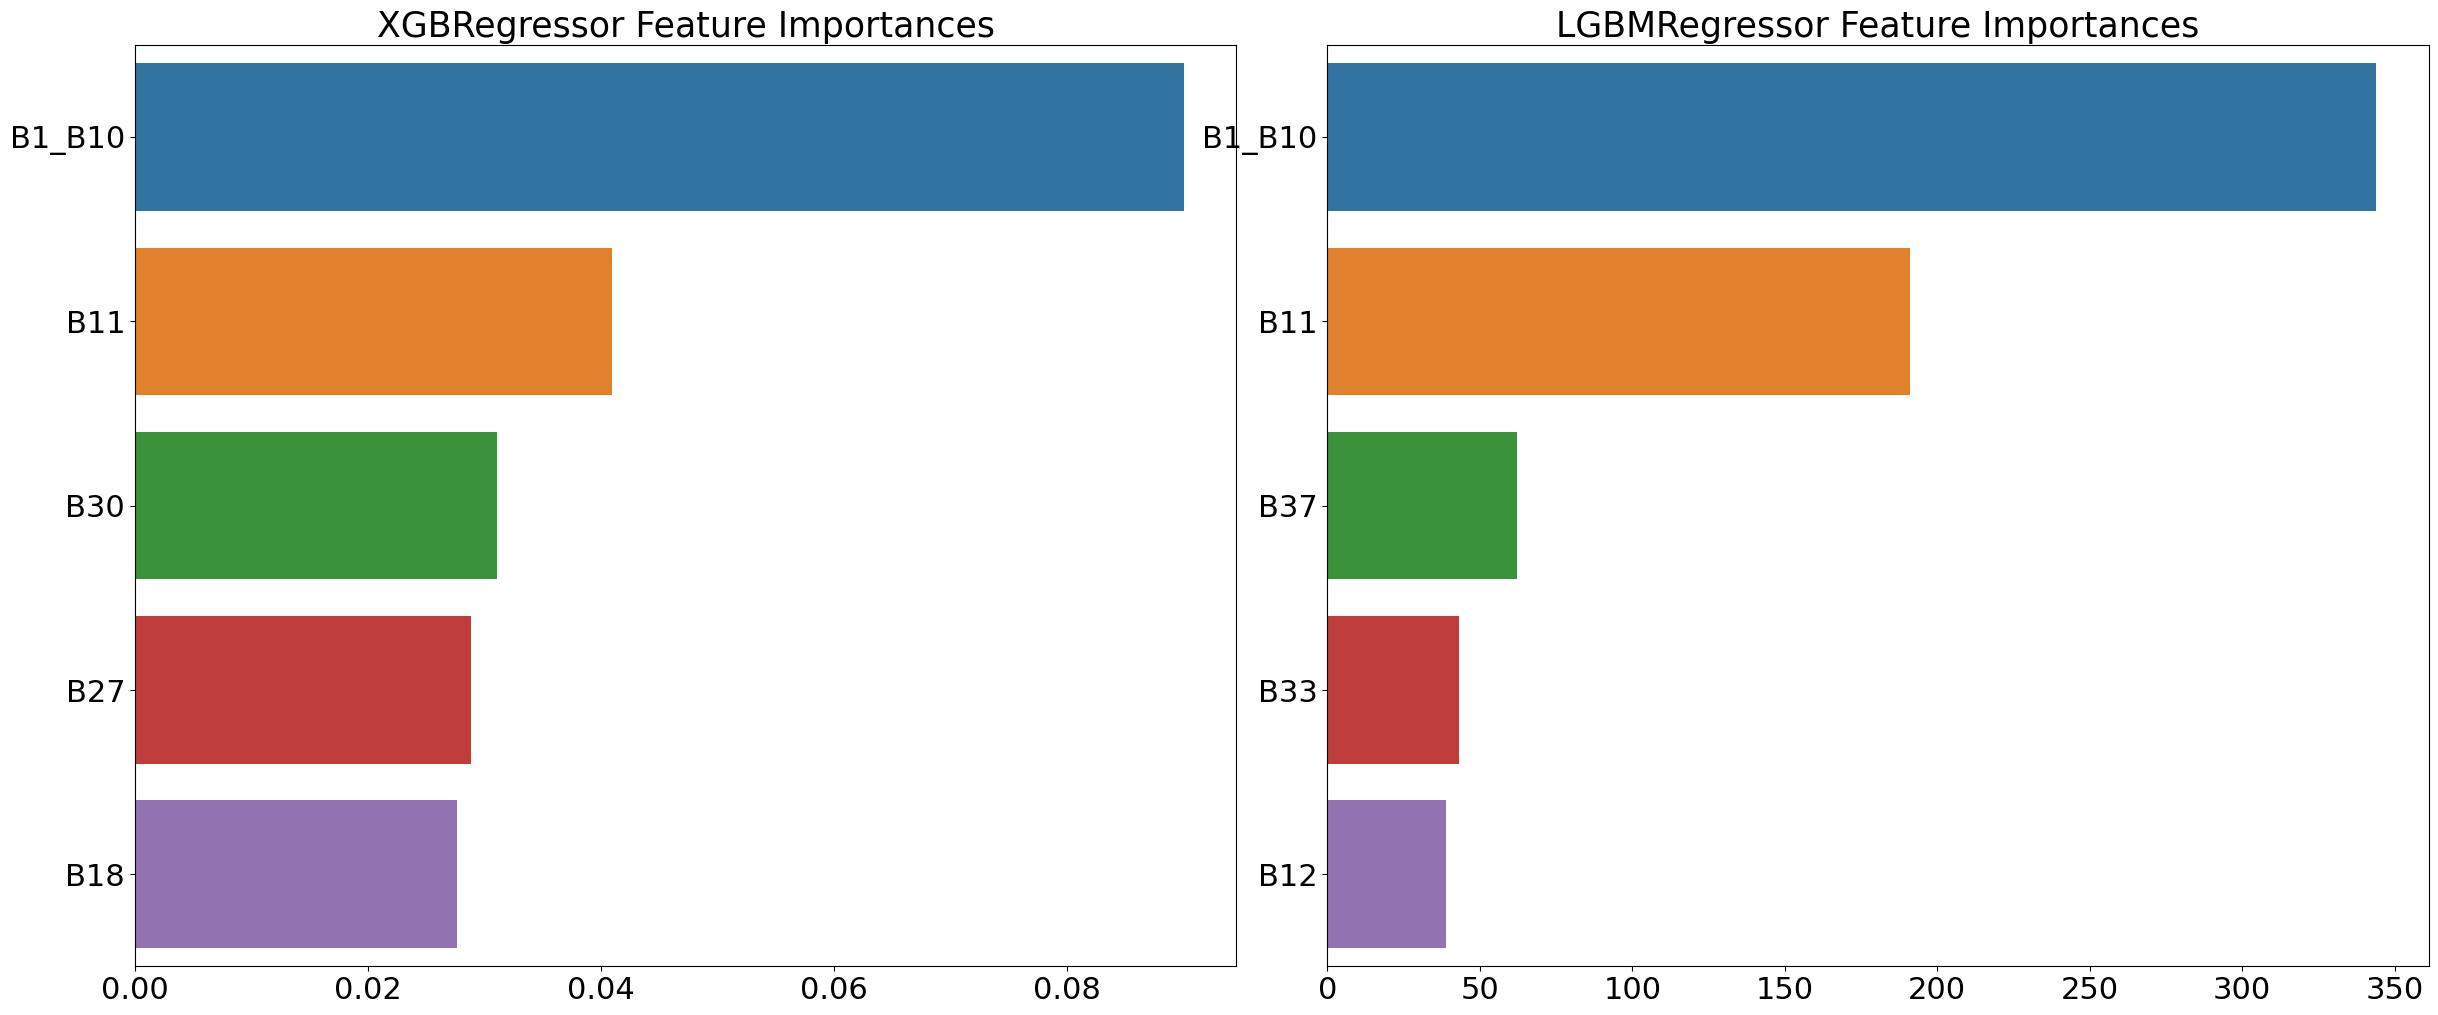

In [30]:
# 모델의 중요도 상위 5개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
    ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]
    return ftr_top5

def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    for i_num, model in enumerate(models):
        # 중요도 상위 5개의 피처명과 그때의 중요도값 추출 
        ftr_top5 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top5.values, y=ftr_top5.index , ax=axs[i_num])

# 앞 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

'B1_B10', 'B11' 가 공통된 상위 변수로 나옴
+ 릿지 및 라쏘 모델까지 고려하면 B31이 공통된 상위 변수

### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

(1) Ridge & Lasso

In [31]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.3 * ridge_pred + 0.7 * lasso_pred

preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.04578386749278969
Ridge 모델의 RMSE: 0.045858224877689736
Lasso 모델의 RMSE: 0.04580835078018714


(2) XGB & LGBM

In [32]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.3 * xgb_pred + 0.7 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.04658805453008895
XGBM 모델의 RMSE: 0.04943853462368361
LGBM 모델의 RMSE: 0.04623598879928181


==> 혼합모델이 더 좋은 성능 X

# CV 세트 기반의 스태킹 모델을 통한 회귀 예측

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train, y_train, X_test, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train.shape[0] ,1 ))
    test_pred = np.zeros((X_test.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train[train_index] 
        y_tr = y_train[train_index] 
        X_te = X_train[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [34]:
y_train =  np.array(y_train)

In [35]:
# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train, y_train, X_test, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train, y_train, X_test, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train, y_train, X_test, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train, y_train, X_test, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [36]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.00004)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.04619238255177978


Stack_final_X_test : 메타 모델이 예측할 테스트용 피처 데이터 세트이다. 

최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 확습한 후에 스태킹된 테스트 데이터 세트로 예측하고, 예측결과를 원본 테스트 레이블 데이터와 비교해 정확도를 측정함.

###VotingRegressor

######모델들의 예측값을 평균하여 앙상블 모델의 최종 예측을 생성 
가중 평균 앙상블 방식이며, 각 모델에 동일한 가중치가 부여

In [37]:
from sklearn.ensemble import VotingRegressor

# 기반 모델 정의
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
ridge_reg = Ridge(alpha=20)
lasso_reg = Lasso(alpha=0.00004)

# 앙상블을 구성할 모델 리스트 정의
models = [('ridge', ridge_reg), ('lasso', lasso_reg), ('xgb', xgb_reg), ('lgbm', lgbm_reg)]

# VotingRegressor를 사용하여 앙상블 모델 정의 (기본값인 'hard'로 설정 => 다수결 방식)
voting_reg = VotingRegressor(estimators=models)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 앙상블 모델 학습
voting_reg.fit(Stack_final_X_train, y_train)

# 앙상블 모델을 사용하여 테스트 데이터 예측
final_predictions = voting_reg.predict(Stack_final_X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print('VotingRegressor 앙상블 모델의 최종 RMSE 값은:', rmse)

VotingRegressor 앙상블 모델의 최종 RMSE 값은: 0.04616511716185317


In [38]:
print("데이터 프레임의 길이:", len(new_behavior))
print("final의 길이:", len(final_predictions))

데이터 프레임의 길이: 5219
final의 길이: 1566


### ▶ 최종 불안전행동 예측값을 새로운 열로 데이터 프레임에 추가

In [39]:
new_behavior = new_behavior[:len(final_predictions)]
new_behavior['Unsafe Act Prediction'] = final_predictions[:len(new_behavior)]

<ipython-input-39-6de04fb08b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_behavior['Unsafe Act Prediction'] = final_predictions[:len(new_behavior)]


In [40]:
new_behavior

,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,...,B56,B57,B58,B59,B60,B61,B62,worker unsafe act,B1_B10,Unsafe Act Prediction
0,3,1,0,1,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0.333333,3.3,0.303346
1,4,1,0,1,0,1,0,1,0,0,...,1,1,0,1,0,0,1,0.250000,4.3,0.252733
2,4,1,0,1,0,1,0,1,0,0,...,1,1,0,1,0,0,1,0.210526,4.7,0.274158
3,4,1,0,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0.250000,5.0,0.269408
4,3,1,0,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0.333333,3.0,0.256449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,3,1,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0.250000,4.5,0.277066
1562,4,1,0,1,0,1,0,1,0,0,...,1,1,0,0,1,0,1,0.200000,4.3,0.224708
1563,3,1,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0.333333,2.9,0.253150
1564,2,1,0,1,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0.307692,2.9,0.240392


# (2) 불안전상태에 대한 예측모델 만들기
## - classifier 
##### KNN, 랜덤포레스트, 나이브베이즈, SVM, 인공신겸망, 로지스틱

### 피쳐들의 상관관계 파악

In [41]:
from sklearn.model_selection import train_test_split , GridSearchCV

XX = new_state[new_state.columns[0:-1]]
yy = new_state["worker unsafe condition"]

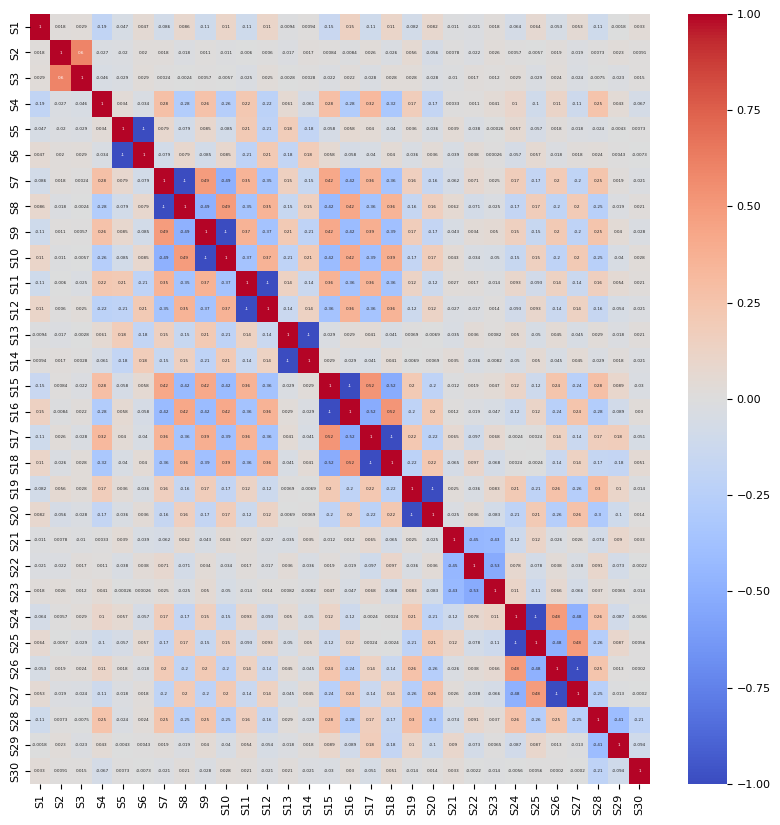

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피쳐들의 상관 행렬 계산
corr = XX.corr()

# heatmap 함수를 사용하여 상관 행렬 시각화
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=8)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=8)  # y축 눈금 폰트 크기
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 3})  # annot_kws를 사용하여 annot의 폰트 크기 조정
plt.show()

###### ▶상관관계가 높은 변수들이 보임. 
- corr값이 S2,S3를 변수 하나로 통합한다 => 총 29개의 독립변수

In [43]:
#S2와 S3가 모두 1일 때에만 S2_S3를 1로 설정하고, 그 외의 경우에는 0으로 설정

new_state['S2_S3'] = (new_state['S2'].astype(bool) & new_state['S3'].astype(bool)).astype(int)
new_state.drop(["S2", "S3"], axis=1, inplace=True)

XX['S2_S3'] = (XX['S2'].astype(bool) & XX['S3'].astype(bool)).astype(int)
XX.drop(["S2", "S3"], axis=1, inplace=True)

print(XX.isna().sum())

S1       0
S4       0
S5       0
S6       0
S7       0
S8       0
S9       0
S10      0
S11      0
S12      0
S13      0
S14      0
S15      0
S16      0
S17      0
S18      0
S19      0
S20      0
S21      0
S22      0
S23      0
S24      0
S25      0
S26      0
S27      0
S28      0
S29      0
S30      0
S2_S3    0
dtype: int64


<ipython-input-43-fcf929fc39a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX['S2_S3'] = (XX['S2'].astype(bool) & XX['S3'].astype(bool)).astype(int)
<ipython-input-43-fcf929fc39a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX.drop(["S2", "S3"], axis=1, inplace=True)


In [44]:
XX

,S1,S4,S5,S6,S7,S8,S9,S10,S11,S12,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,S2_S3
0,2,1,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
1,2,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1
2,2,8,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
3,1,40,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
4,1,0,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,2,4,1,0,0,1,0,1,0,1,...,0,1,1,0,1,0,0,0,0,0
5215,2,11,1,0,0,1,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1
5216,2,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
5217,2,3,0,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0


###상관관계 재시각화

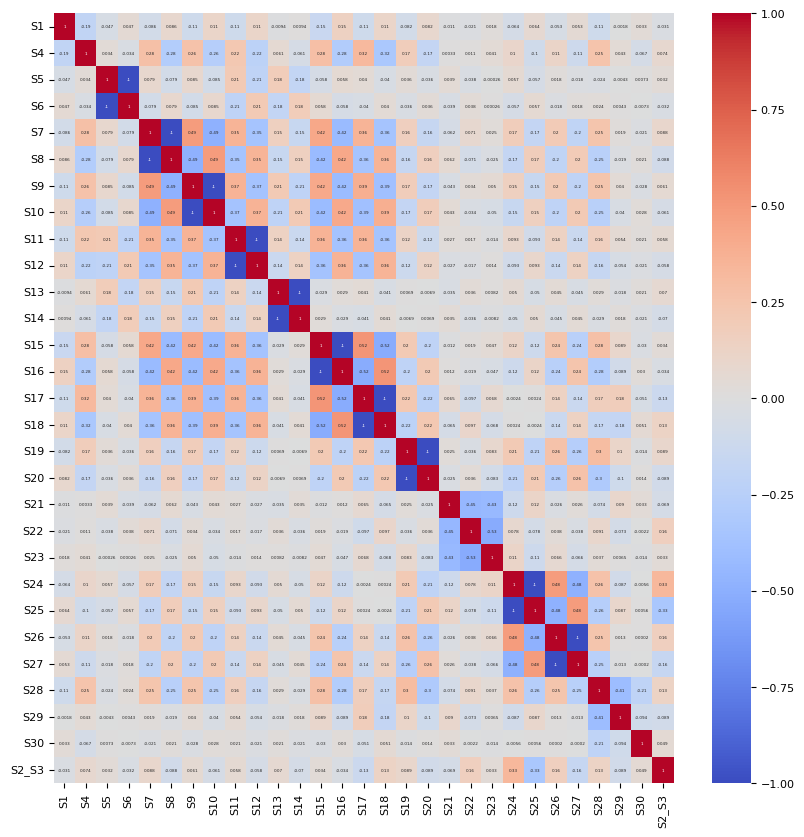

In [45]:
# 피쳐들의 상관 행렬 계산
corr = XX.corr()

# heatmap 함수를 사용하여 상관 행렬 시각화
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=8)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=8)  # y축 눈금 폰트 크기
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 3})  # annot_kws를 사용하여 annot의 폰트 크기 조정
plt.show()

### 정규화 및 train/test 분리

In [46]:
# 학습 세트, 테스트 세트로 데이터 나누기
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

XX_train

,S1,S4,S5,S6,S7,S8,S9,S10,S11,S12,...,S22,S23,S24,S25,S26,S27,S28,S29,S30,S2_S3
2465,2,2,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
2610,2,1,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
4701,1,2,0,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1879,2,0,0,1,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
1172,2,3,0,1,1,0,0,1,1,0,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
3092,1,1,0,1,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,1
3772,1,8,0,1,0,1,1,0,0,1,...,0,0,0,1,1,0,1,0,0,1
5191,1,1,0,1,0,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1


In [47]:
print(XX_train.isna().sum())

S1       0
S4       0
S5       0
S6       0
S7       0
S8       0
S9       0
S10      0
S11      0
S12      0
S13      0
S14      0
S15      0
S16      0
S17      0
S18      0
S19      0
S20      0
S21      0
S22      0
S23      0
S24      0
S25      0
S26      0
S27      0
S28      0
S29      0
S30      0
S2_S3    0
dtype: int64


## 스태킹 앙상블

In [48]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score      ############

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
nb_clf = GaussianNB()
svm_clf = SVC()
nn_clf = MLPClassifier()

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [49]:
# 개별 모델들을 학습. 
knn_clf.fit(XX_train, yy_train)
rf_clf.fit(XX_train , yy_train)
nb_clf.fit(XX_train , yy_train)
svm_clf.fit(XX_train , yy_train)
nn_clf.fit(XX_train , yy_train)


MLPClassifier()

In [50]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(XX_test)
rf_pred = rf_clf.predict(XX_test)
nb_pred = nb_clf.predict(XX_test)
svm_pred = nb_clf.predict(XX_test)
nn_pred = nb_clf.predict(XX_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(yy_test, knn_pred)))
# print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(yy_test, rf_pred)))
print('나이브베이즈 정확도: {0:.4f}'.format(accuracy_score(yy_test,nb_pred)))
print('SVM 정확도: {0:.4f}'.format(accuracy_score(yy_test,svm_pred)))
print('인공신경망 정확도: {0:.4f}'.format(accuracy_score(yy_test,nn_pred)))

KNN 정확도: 0.8908
나이브베이즈 정확도: 0.9981
SVM 정확도: 0.9981
인공신경망 정확도: 0.9981


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [52]:
from sklearn.linear_model import LogisticRegression

knn_pred_proba = knn_clf.predict_proba(XX_test)[:, 1]
rf_pred_proba = rf_clf.predict_proba(XX_test)[:, 1]
nb_pred_proba = nb_clf.predict_proba(XX_test)[:, 1]
svm_pred_scores = svm_clf.decision_function(XX_test)
nn_pred_proba = nn_clf.predict_proba(XX_test)[:, 1]

#get_clf_eval() 함수를 이용하여 평가 수행. 
print("KNN 평가:")
get_clf_eval(yy_test, knn_pred, knn_pred_proba)
print(" ")
# print("랜덤 포레스트 평가:")
# get_clf_eval(yy_test, rf_pred, rf_pred_proba)
# print(" ")
print("나이브 베이즈 평가:")
get_clf_eval(yy_test, nb_pred, nb_pred_proba)
print(" ")
print("SVM 평가:")
get_clf_eval(yy_test, nb_pred, svm_pred_scores)
print(" ")
print("인공신경망 평가:")
get_clf_eval(yy_test, nb_pred, nn_pred_proba)

KNN 평가:
오차 행렬
[[1003   53]
 [ 118  392]]
정확도: 0.8908, 정밀도: 0.8809, 재현율: 0.7686,    F1: 0.8209, AUC:0.9305
 
나이브 베이즈 평가:
오차 행렬
[[1056    0]
 [   3  507]]
정확도: 0.9981, 정밀도: 1.0000, 재현율: 0.9941,    F1: 0.9971, AUC:1.0000
 
SVM 평가:
오차 행렬
[[1056    0]
 [   3  507]]
정확도: 0.9981, 정밀도: 1.0000, 재현율: 0.9941,    F1: 0.9971, AUC:0.9999
 
인공신경망 평가:
오차 행렬
[[1056    0]
 [   3  507]]
정확도: 0.9981, 정밀도: 1.0000, 재현율: 0.9941,    F1: 0.9971, AUC:1.0000


In [53]:
pred = np.array([knn_pred, nb_pred, svm_pred, nn_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 1566)
(1566, 4)


In [54]:
lr_final.fit(pred, yy_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(yy_test, final)))

final_proba = lr_final.predict_proba(pred)[:, 1]

#get_clf_eval() 함수를 이용하여 평가 수행.
print(" ")
print("최종 메타 모델 평가:")
get_clf_eval(yy_test, final, final_proba)

최종 메타 모델의 예측 정확도: 0.9981
 
최종 메타 모델 평가:
오차 행렬
[[1056    0]
 [   3  507]]
정확도: 0.9981, 정밀도: 1.0000, 재현율: 0.9941,    F1: 0.9971, AUC:0.9969


###  ▶ 최종 불안전상태 예측값을 새로운 열로 데이터 프레임에 추가

In [55]:
print("데이터 프레임의 길이:", len(new_state))
print("final의 길이:", len(final))

데이터 프레임의 길이: 5219
final의 길이: 1566


In [56]:
new_state = new_state[:len(final)]
new_state['Unsafe Condition Prediction'] = final[:len(new_state)]

<ipython-input-56-e7fe1d926e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_state['Unsafe Condition Prediction'] = final[:len(new_state)]


In [57]:
new_state

,S1,S4,S5,S6,S7,S8,S9,S10,S11,S12,...,S24,S25,S26,S27,S28,S29,S30,worker unsafe condition,S2_S3,Unsafe Condition Prediction
0,2,1,0,1,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,2,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,0
2,2,8,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1
3,1,40,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1
4,1,0,0,1,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,2,40,0,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
1562,2,7,0,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
1563,2,8,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,1,0,1,0
1564,1,2,0,1,0,1,1,0,0,1,...,1,0,0,1,1,0,0,0,1,1


### feature importance 확인(랜덤포레스트 활용)

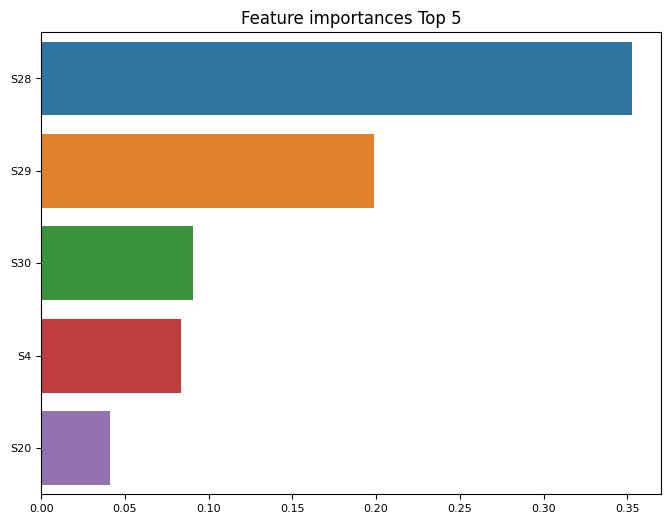

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=XX_train.columns  )
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top5 , y = ftr_top5.index)
plt.show()

# 최종 아차사고 발생 예측
  ▶ 최종 아차사고 발생 예측값 도출(불안전행동 불안전상태의 조합)

  ▶ 아차사고란 불안전행동과 불안전상태의 시스템적 영향으로 발생. 단선적 발생 결과가 아님

In [59]:
# new_state와 new_behavior를 연결(concatenate)
new_df = pd.concat([new_state, new_behavior], axis=1)

#왜곡 방지 로그변환
# Add a small constant to prevent zero or negative values
small_constant = 1e-8
new_df[['Unsafe Condition Prediction', 'Unsafe Act Prediction']] = np.log(new_df[['Unsafe Condition Prediction', 'Unsafe Act Prediction']]+ small_constant)

# Initialize the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 정규화 'Unsafe Condition Prediction' & 'Unsafe Act Prediction' columns
new_df[['Unsafe Condition Prediction', 'Unsafe Act Prediction']] = scaler.fit_transform(new_df[['Unsafe Condition Prediction', 'Unsafe Act Prediction']])

# 새로운 열 생성 및 값 할당

weight_binary = 0.5  # Weight for the binary variable
weight_continuous = 0.5  # Weight for the continuous variable
#곱하면 0이 너무 많아지는 불균형 문제 발생
new_df['Near miss accident'] = (weight_binary * new_df['Unsafe Act Prediction']) + (weight_continuous * new_df['Unsafe Condition Prediction'])

# 'Unsafe Condition Prediction'과 'Unsafe Act Prediction' 열 삭제
new_df.drop(['Unsafe Condition Prediction', 'Unsafe Act Prediction'], axis=1, inplace=True)

In [60]:
new_df

,S1,S4,S5,S6,S7,S8,S9,S10,S11,S12,...,B56,B57,B58,B59,B60,B61,B62,worker unsafe act,B1_B10,Near miss accident
0,2,1,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0.333333,3.3,0.205356
1,2,1,0,1,0,1,0,1,0,1,...,1,1,0,1,0,0,1,0.250000,4.3,0.095515
2,2,8,0,1,0,1,0,1,0,1,...,1,1,0,1,0,0,1,0.210526,4.7,0.644477
3,1,40,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0.250000,5.0,0.633961
4,1,0,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0.333333,3.0,0.104297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,2,40,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0.250000,4.5,0.150828
1562,2,7,0,1,1,0,1,0,1,0,...,1,1,0,0,1,0,1,0.200000,4.3,0.024790
1563,2,8,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0.333333,2.9,0.096505
1564,1,2,0,1,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0.307692,2.9,0.565389


## 군집화
   - 아차사고 발생 위험도에 따른 군집을 구하고 해당 군집의 영향 요인들의 특성 파악
   - 개별화된 아차사고 방지 대책 전략 수립

In [61]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#새로운 df 형성
newnew_df = new_df.drop(["worker unsafe act", "worker unsafe condition"], axis=1)

# 군집화 레이블을 'Near miss accident'로 설정, 이때 'Near miss accident'는 연속형이라 군집화를 통해 레이블 설정 

def cluster_array(df, col, num_clusters):

    # k-means 알고리즘을 사용하여 군집화 수행
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df[[col]])

    # 각 데이터 포인트의 군집 할당 결과를 가져옵니다.
    labels = kmeans.labels_

    df['cluster'] = kmeans.labels_

    return df

newnew_df = cluster_array(newnew_df, 'Near miss accident', 2)


newnew_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,S1,S4,S5,S6,S7,S8,S9,S10,S11,S12,...,B56,B57,B58,B59,B60,B61,B62,B1_B10,Near miss accident,cluster
0,2,1,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,3.3,0.205356,0
1,2,1,0,1,0,1,0,1,0,1,...,1,1,0,1,0,0,1,4.3,0.095515,0
2,2,8,0,1,0,1,0,1,0,1,...,1,1,0,1,0,0,1,4.7,0.644477,1
3,1,40,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,5.0,0.633961,1
4,1,0,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,3.0,0.104297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,2,40,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,1,4.5,0.150828,0
1562,2,7,0,1,1,0,1,0,1,0,...,1,1,0,0,1,0,1,4.3,0.024790,0
1563,2,8,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,1,2.9,0.096505,0
1564,1,2,0,1,0,1,1,0,0,1,...,1,0,1,0,1,0,1,2.9,0.565389,1


In [62]:
for group in np.sort(newnew_df.cluster.unique()):
  print(f"그룹 {group}의 아차사고 발생확률 평균: {newnew_df.loc[newnew_df.cluster==group, 'Near miss accident'].mean()}")

그룹 0의 아차사고 발생확률 평균: 0.1096003098564205
그룹 1의 아차사고 발생확률 평균: 0.6254840478870594


In [63]:
# 모든 개별 데이터에 실루엣 계수값을 구함. 

score_samples = silhouette_samples(newnew_df, newnew_df['cluster'] )
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# new_df에 실루엣 계수 컬럼 추가
newnew_df['silhouette_coeff'] = score_samples

newnew_df.head(10)

silhouette_samples( ) return 값의 shape (1566,)


,S1,S4,S5,S6,S7,S8,S9,S10,S11,S12,...,B57,B58,B59,B60,B61,B62,B1_B10,Near miss accident,cluster,silhouette_coeff
0,2,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,3.3,0.205356,0,-0.032073
1,2,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,4.3,0.095515,0,-0.028639
2,2,8,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,4.7,0.644477,1,0.058819
3,1,40,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,5.0,0.633961,1,0.008940
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,3.0,0.104297,0,-0.027830
5,1,1,0,1,0,1,1,0,0,1,...,0,1,0,1,0,1,3.0,0.622877,1,0.043457
6,2,2,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,4.8,0.585296,1,0.047439
7,2,3,0,1,0,1,0,1,0,1,...,1,0,0,1,0,1,3.6,0.138659,0,-0.036705
8,2,4,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,3.7,0.144294,0,-0.037109
9,2,4,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,4.3,0.077010,0,-0.036875


In [64]:
newnew_df.groupby("cluster")['silhouette_coeff'].mean()

cluster
0   -0.032504
1    0.046537
Name: silhouette_coeff, dtype: float64

실루엣 계수를 평가할 때는 고려할점:

1. 실루엣 계수의 평균값이 어느 정도인지 . 전체적으로 높은 평균 실루엣 계수는 안정적인 군집화를 나타낼 수 있다.
2. 개별 데이터 포인트의 실루엣 계수 분포를 살펴봅니다. 대부분의 데이터 포인트가 높은 실루엣 계수를 가지고 있고, 군집 간 실루엣 계수 차이가 크다면 안정적인 군집화로 볼 수 있다.
3. 실루엣 계수는 높을수록 좋음

In [65]:
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(newnew_df,newnew_df['cluster'])))

실루엣 스코어는 : -0.007


### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 

In [66]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [67]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

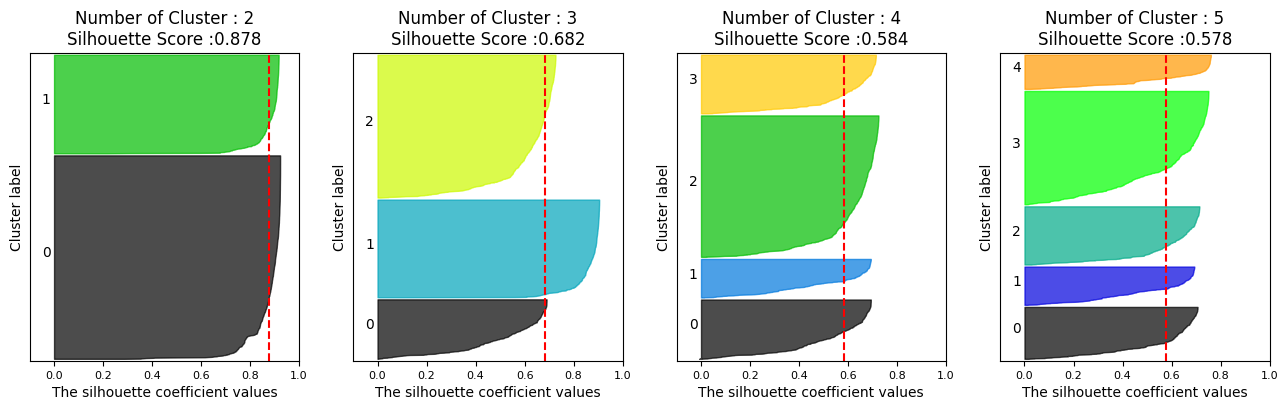

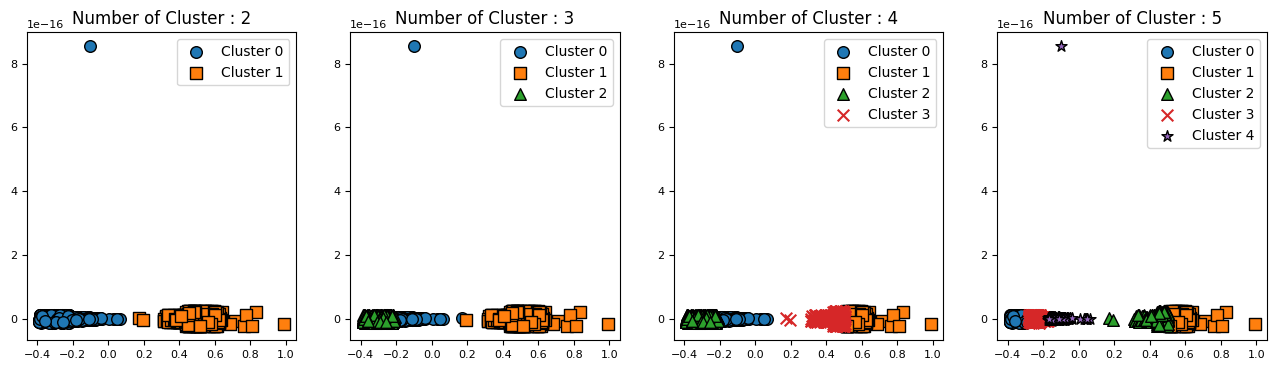

In [68]:
from sklearn.preprocessing import StandardScaler

X_features = newnew_df[['Near miss accident', 'Near miss accident']]


visualize_silhouette([ 2, 3, 4,5 ], X_features)
visualize_kmeans_plot_multi([2,3,4,5],X_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

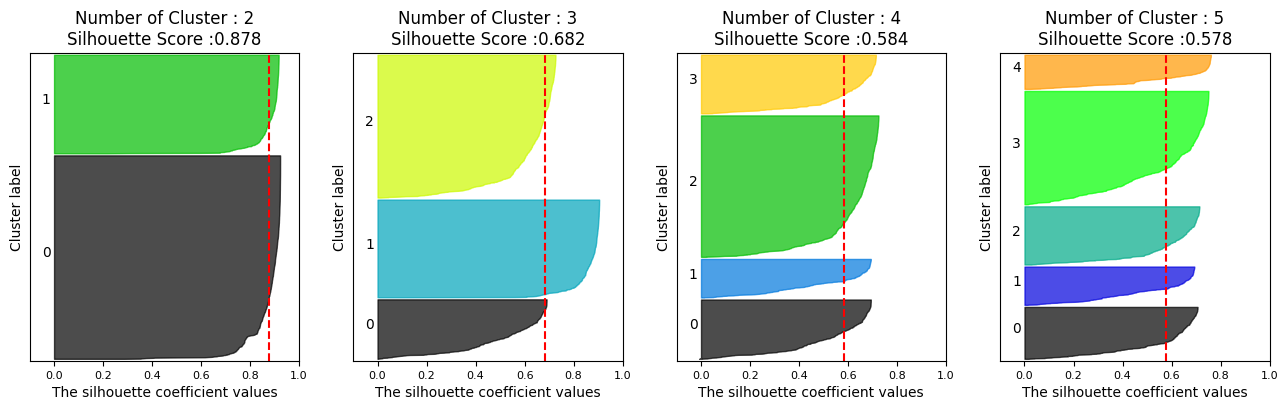

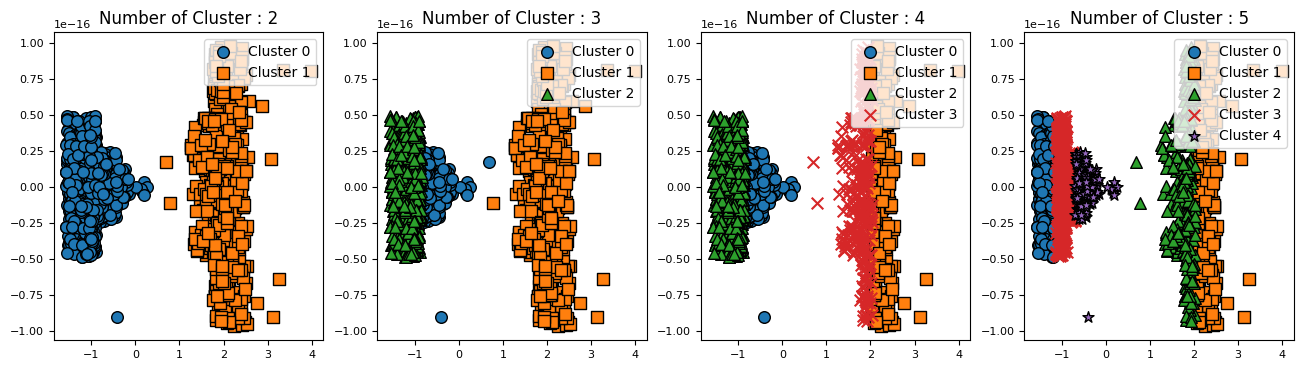

In [69]:
from sklearn.preprocessing import StandardScaler

X_features = newnew_df[['Near miss accident', 'Near miss accident']]
X_features_scaled = StandardScaler().fit_transform(X_features)

visualize_silhouette([ 2, 3, 4,5 ], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

정규화는 데이터의 스케일을 조정하여 모든 변수가 동일한 범위에 있도록 만드는 작업입니다. 정규화를 하면 데이터의 범위가 축소되어 실루엣 계수가 작아질 수 있습니다. 이는 데이터의 스케일이 작아지기 때문에 군집 간 거리가 상대적으로 작아지고, 실루엣 계수가 감소하는 결과를 가져올 수 있습니다.

##### 실루엣 계수와 군집화 구성을 시각화한 결과 균일하게 군집화가 구성되었다는 것을 알 수 있음

→ 아차사고 위험도 별 그룹의 특성 파악을 통해 아차사고 대비 전략 수립에 목적을 두었기에 좀더 세분화된 그룹으로 파악함이 중요하다고 판단


&

실루엣계수로 인한 평가와 시각화를 통해 최종 군집은 2개로 결정

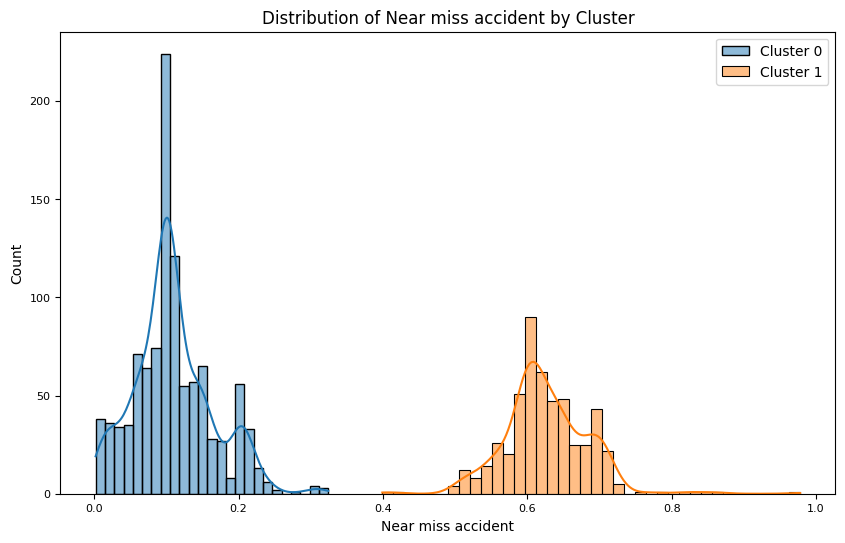

In [70]:
import matplotlib.pyplot as plt

# 아차사고 위험의 분포 시각화
plt.figure(figsize=(10, 6))
for cluster_label in newnew_df['cluster'].unique():
    sns.histplot(newnew_df[newnew_df['cluster'] == cluster_label]['Near miss accident'], kde=True, label=f'Cluster {cluster_label}')
plt.xlabel('Near miss accident')
plt.ylabel('Count')
plt.title('Distribution of Near miss accident by Cluster')
plt.legend()
plt.show()

이런식으로 각 군집의 히스토그램을 비교하면, 군집 간 아차사고 예측 열 값의 분포 차이를 시각적으로 확인할 수 있다. 이를 통해 군집들 간의 특징적인 차이를 발견하고, 각 군집의 특성을 파악할 수 있다.

### 군집별 아차사고 위험도 파악
▶ 군집별로 시각화 그래프 만들어서 넣기


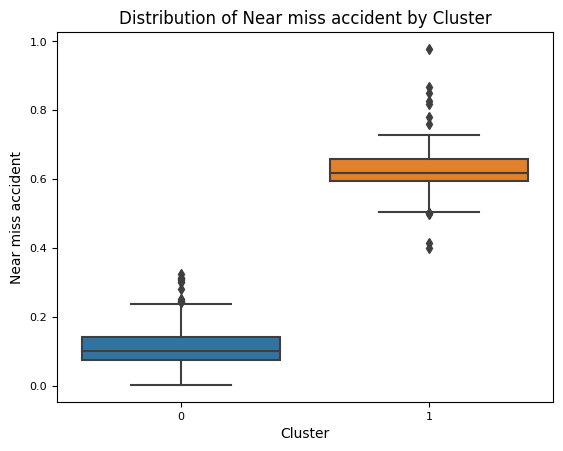

In [71]:
import seaborn as sns

# 아차사고 위험의 분포 시각화

sns.boxplot(x = newnew_df['cluster'], y= newnew_df['Near miss accident'], data=newnew_df)
plt.xlabel('Cluster')
plt.ylabel('Near miss accident')
plt.title('Distribution of Near miss accident by Cluster')
plt.show()


In [72]:
#주요 불안전행동 영향 요인 경향 파악

cluster_1_means = newnew_df.groupby('cluster')['B1_B10'].mean()
print('군집별 B1_B10 특성: ',cluster_1_means)
print(" ")

cluster_2_means = newnew_df.groupby('cluster')['B11'].mean()
print('군집별 B11 특성: ',cluster_2_means) 
print(" ")

cluster_3_means = newnew_df.groupby('cluster')['B35'].mean()
print( '군집별 B35 특성: ', cluster_3_means)
print(" ")

# cluster_38_means = new_df.groupby('cluster')['B38'].mean()
# print( '군집별 B38 특성: ', cluster_38_means)
# print(" ")

# cluster_34_means = new_df.groupby('cluster')['B34'].mean()
# print( '군집별 B34 특성: ', cluster_34_means)
# print(" ")


군집별 B1_B10 특성:  cluster
0    3.845687
1    3.845793
Name: B1_B10, dtype: float64
 
군집별 B11 특성:  cluster
0    3.622749
1    3.630137
Name: B11, dtype: float64
 
군집별 B31 특성:  cluster
0    0.896682
1    0.888454
Name: B31, dtype: float64
 


### 클러스터별 주요 영향 변수 시각화

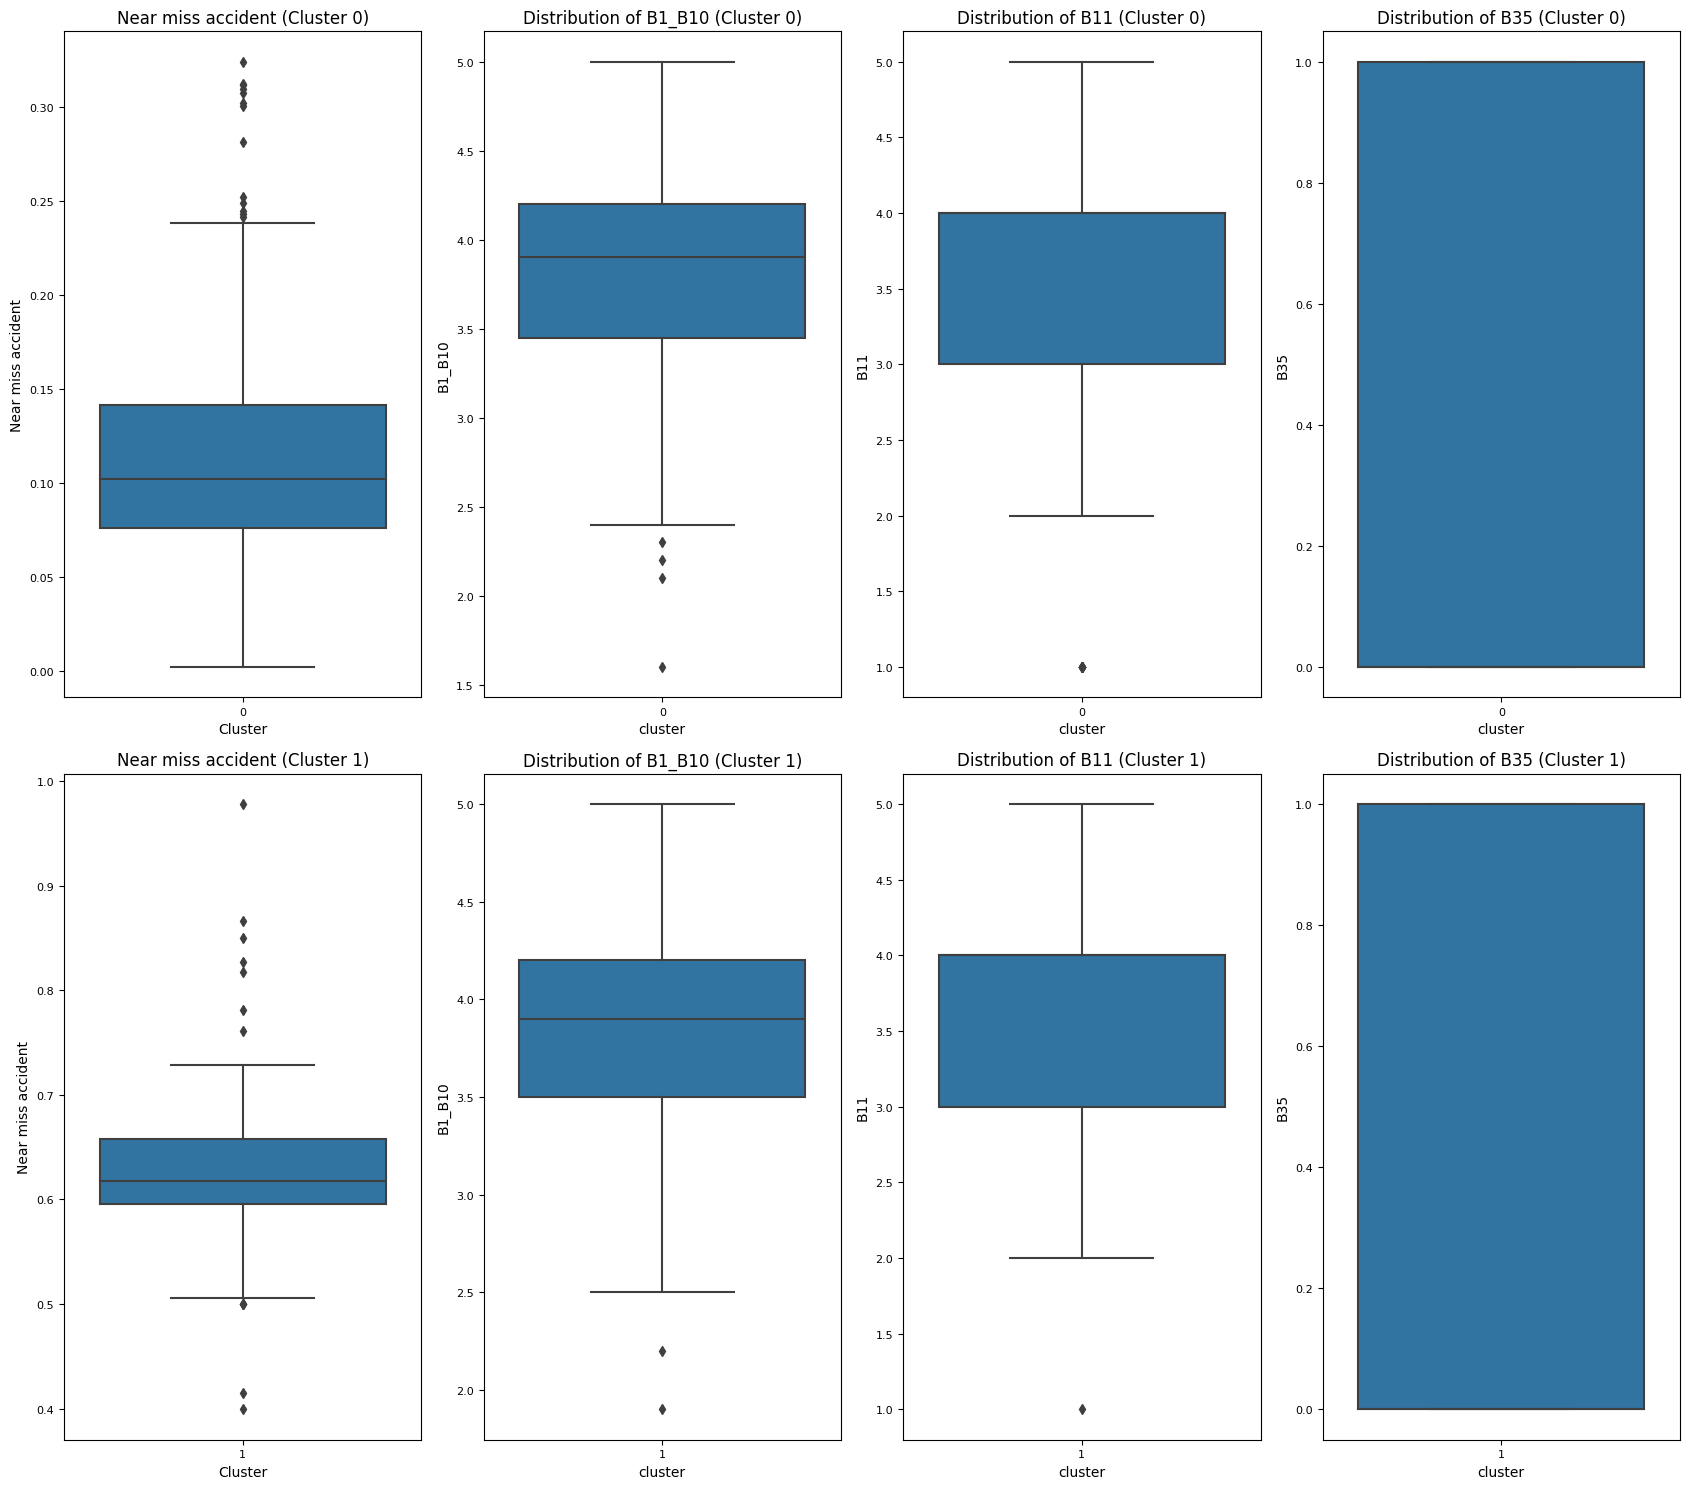

In [76]:
target_columns = ['B1_B10', 'B11', 'B35']

fig, axes = plt.subplots(2, len(target_columns) + 1, figsize=(17, 15))

for cluster_label, ax_row in zip(newnew_df['cluster'].unique(), axes):
    sns.boxplot(x='cluster', y='Near miss accident', data=newnew_df[newnew_df['cluster'] == cluster_label], ax=ax_row[0])
    
    for i, target_col in enumerate(target_columns):
        sns.boxplot(x='cluster', y=target_col, data=newnew_df[newnew_df['cluster'] == cluster_label], ax=ax_row[i+1])
        ax_row[i+1].set_ylabel(target_col)
        ax_row[i+1].set_title(f'Distribution of {target_col} (Cluster {cluster_label})')
    
    ax_row[0].set_xlabel('Cluster')
    ax_row[0].set_ylabel('Near miss accident')
    ax_row[0].set_title(f'Near miss accident (Cluster {cluster_label})')

plt.tight_layout()
plt.show()

In [74]:
#주요 불안전상태 영향 요인 경향 파악

cluster_S28_means = newnew_df.groupby('cluster')['S28'].mean()
print('군집별 S28 특성: ',cluster_S28_means)
print(" ")

cluster_S29_means = newnew_df.groupby('cluster')['S29'].mean()
print('군집별 S29 특성: ',cluster_S29_means) 
print(" ")

cluster_S30_means = newnew_df.groupby('cluster')['S30'].mean()
print( '군집별 S30 특성: ', cluster_S30_means)
print(" ")

# cluster_S4_means = new_df.groupby('cluster')['S4'].mean()
# print( '군집별 S4 특성: ', cluster_S4_means)
# print(" ")

# cluster_S19_means = new_df.groupby('cluster')['S19'].mean()
# print('군집별 S19 특성: ',cluster_S19_means)
# print(" ")

군집별 S28 특성:  cluster
0    0.678673
1    0.679061
Name: S28, dtype: float64
 
군집별 S29 특성:  cluster
0    0.082464
1    0.086106
Name: S29, dtype: float64
 
군집별 S30 특성:  cluster
0    0.036019
1    0.033268
Name: S30, dtype: float64
 


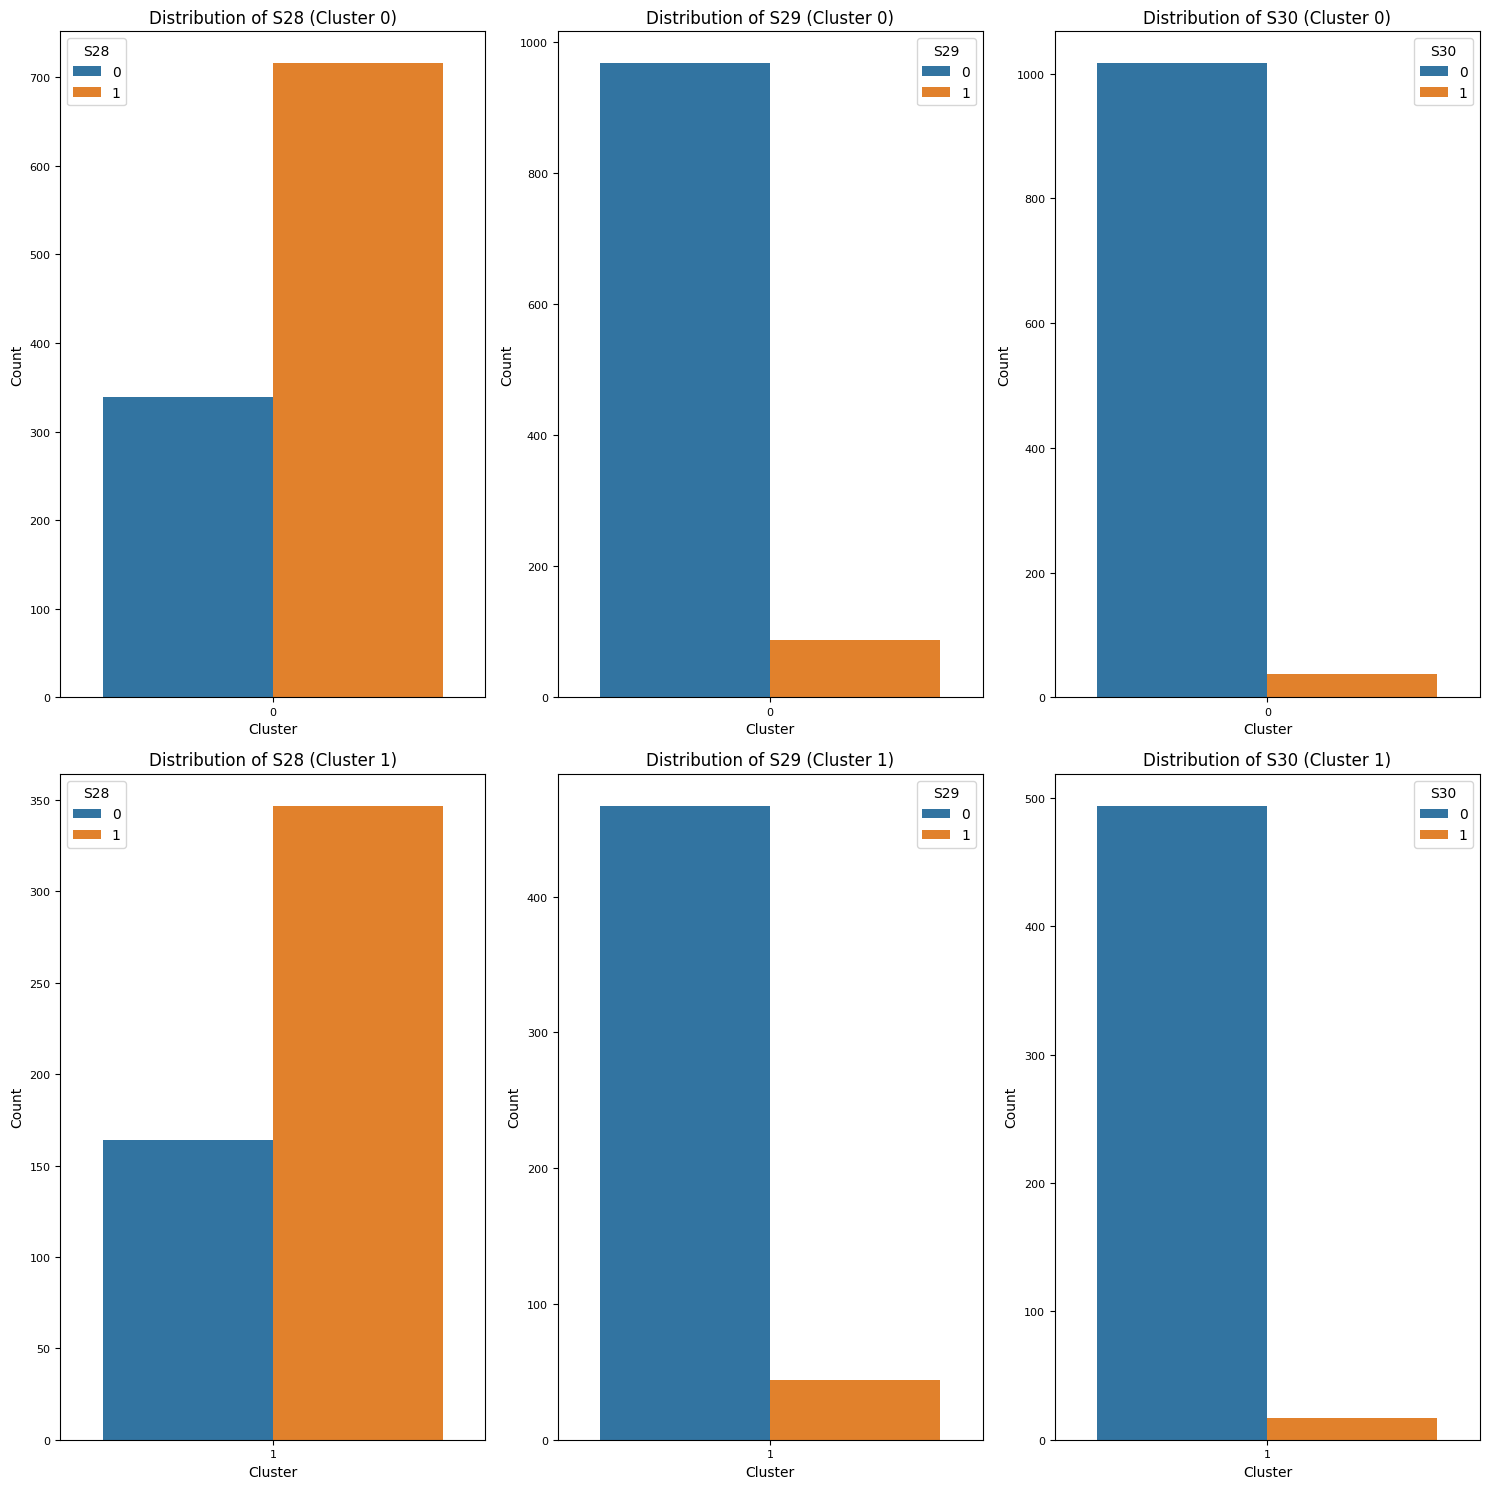

In [75]:
target_columns = ['S28','S29', 'S30']

fig, axes = plt.subplots(2, len(target_columns), figsize=(15, 15))

for cluster_label, ax_row in zip(newnew_df['cluster'].unique(), axes):
    for i, target_col in enumerate(target_columns):
        if target_col == 'S4':
            sns.boxplot(x='cluster', y=target_col, data=newnew_df[newnew_df['cluster'] == cluster_label], ax=ax_row[i])
            ax_row[i].set_ylabel(target_col)
            ax_row[i].set_title(f'Distribution of {target_col} (Cluster {cluster_label})')
        else:
            sns.countplot(x='cluster', hue=target_col, data=newnew_df[newnew_df['cluster'] == cluster_label], ax=ax_row[i])
            ax_row[i].set_xlabel('Cluster')
            ax_row[i].set_ylabel('Count')
            ax_row[i].set_title(f'Distribution of {target_col} (Cluster {cluster_label})')

plt.tight_layout()
plt.show()

클러스터 4에서는 영향요인의 이러한 특성~~~~~~이 있고 아차사고 발생 위험을 낮추기 위해 S19에 해당되는 것을 줄이는지~~~ S 29에 해당되는 값은 부정적이게 하는지 ~~~~~~~블라블라 